In [1]:
import sys
import os
from datetime import datetime
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso



In [2]:
sys.path.append(os.path.abspath('../src'))
from lib import (
    #get_train_test_split,
    #get_trained_model,
    train_and_evaluate_models,
    create_eui_comparison_plots,
    evaluate_model_strategies,
    calculate_average_metrics,
    create_error_distribution_plots
)

In [3]:
output_path = "../data/03_processed/merged_df.csv"
merged_df = pd.read_csv(output_path)
merged_df = merged_df.rename(columns={'total_year': 'hdd_total_year'})

# GDP per capita
merged_df['GDP_per_capita'] = merged_df['GDP_2022'] / merged_df['Population_2023']

# Delete Taiwan (temporal)
merged_df = merged_df[merged_df['Country'] != 'Taiwan']

#np.random.seed(123)
#merged_df['is_train'] = np.random.choice([1, 0], size=len(merged_df), p=[0.8, 0.2])

# Train / Test

In [4]:
train_test_split_original_data_path = "../data/03_processed/train_test_split_original_data.csv"
train_test_split_original_data = pd.read_csv(train_test_split_original_data_path)

train_test_split_new_data_path = "../data/03_processed/train_test_split_new_data.csv"
train_test_split_new_data = pd.read_csv(train_test_split_new_data_path)

train_test_split = pd.concat([train_test_split_original_data, train_test_split_new_data], ignore_index=True)

merged_df = merged_df.merge(train_test_split, on=['index', 'geonameid'], how='left')

# We want to keep original data 
merged_df = merged_df[merged_df["source"] == "World Bank CURB"]

In [5]:
features = [
    "hdd_total_year", 
    "cdd_total_year", 
    "GDP_per_capita", 
    "Urbanization_Rate_2022",
    #"latitude",
    #"longitude",  
    "Paris_Agreement",
    "Subnational HDI", 
    "Educational index", 
    "Income index",
    "2m_temperature_2023_avg",
    "2m_dewpoint_temperature_2023_avg",
    "total_precipitation_2023",
    "longitude_sin", 
    "longitude_cos", 
    "latitude_sin", 
    "latitude_cos",  
    "population_density"
]

feature_abbreviations = {
    "hdd_total_year": "HDD",
    "cdd_total_year": "CDD", 
    "GDP_per_capita": "GDP",
    "Urbanization_Rate_2022": "URB",
   # "latitude": "Lat",
   # "longitude": "Long",
    "Paris_Agreement": "Paris",
    "Subnational HDI": "HDI", 
    "Educational index": "EDU" , 
    "Income index": "Income",
    "2m_temperature_2023_avg": "Temp",
    "2m_dewpoint_temperature_2023_avg": "Dew",
    "total_precipitation_2023": "Precip",
    "longitude_sin": "Long_Sin", 
    "longitude_cos": "Long_Cos", 
    "latitude_sin": "Lat_Sin", 
    "latitude_cos": "Lat_Cos",  
    "population_density": "Pop_Dens"
}

target_columns = [
    "Residential EUI (kWh/m2/year)",
    "Non-residential EUI (kWh/m2/year)"
]

regions = ['Asia & Oceania', 'Europe', 'Africa', 'Central and South America', 'Northern America']


# Linear Regression (Base Line Model) 

### Linear Regression (Base Line Model) - Within Domain

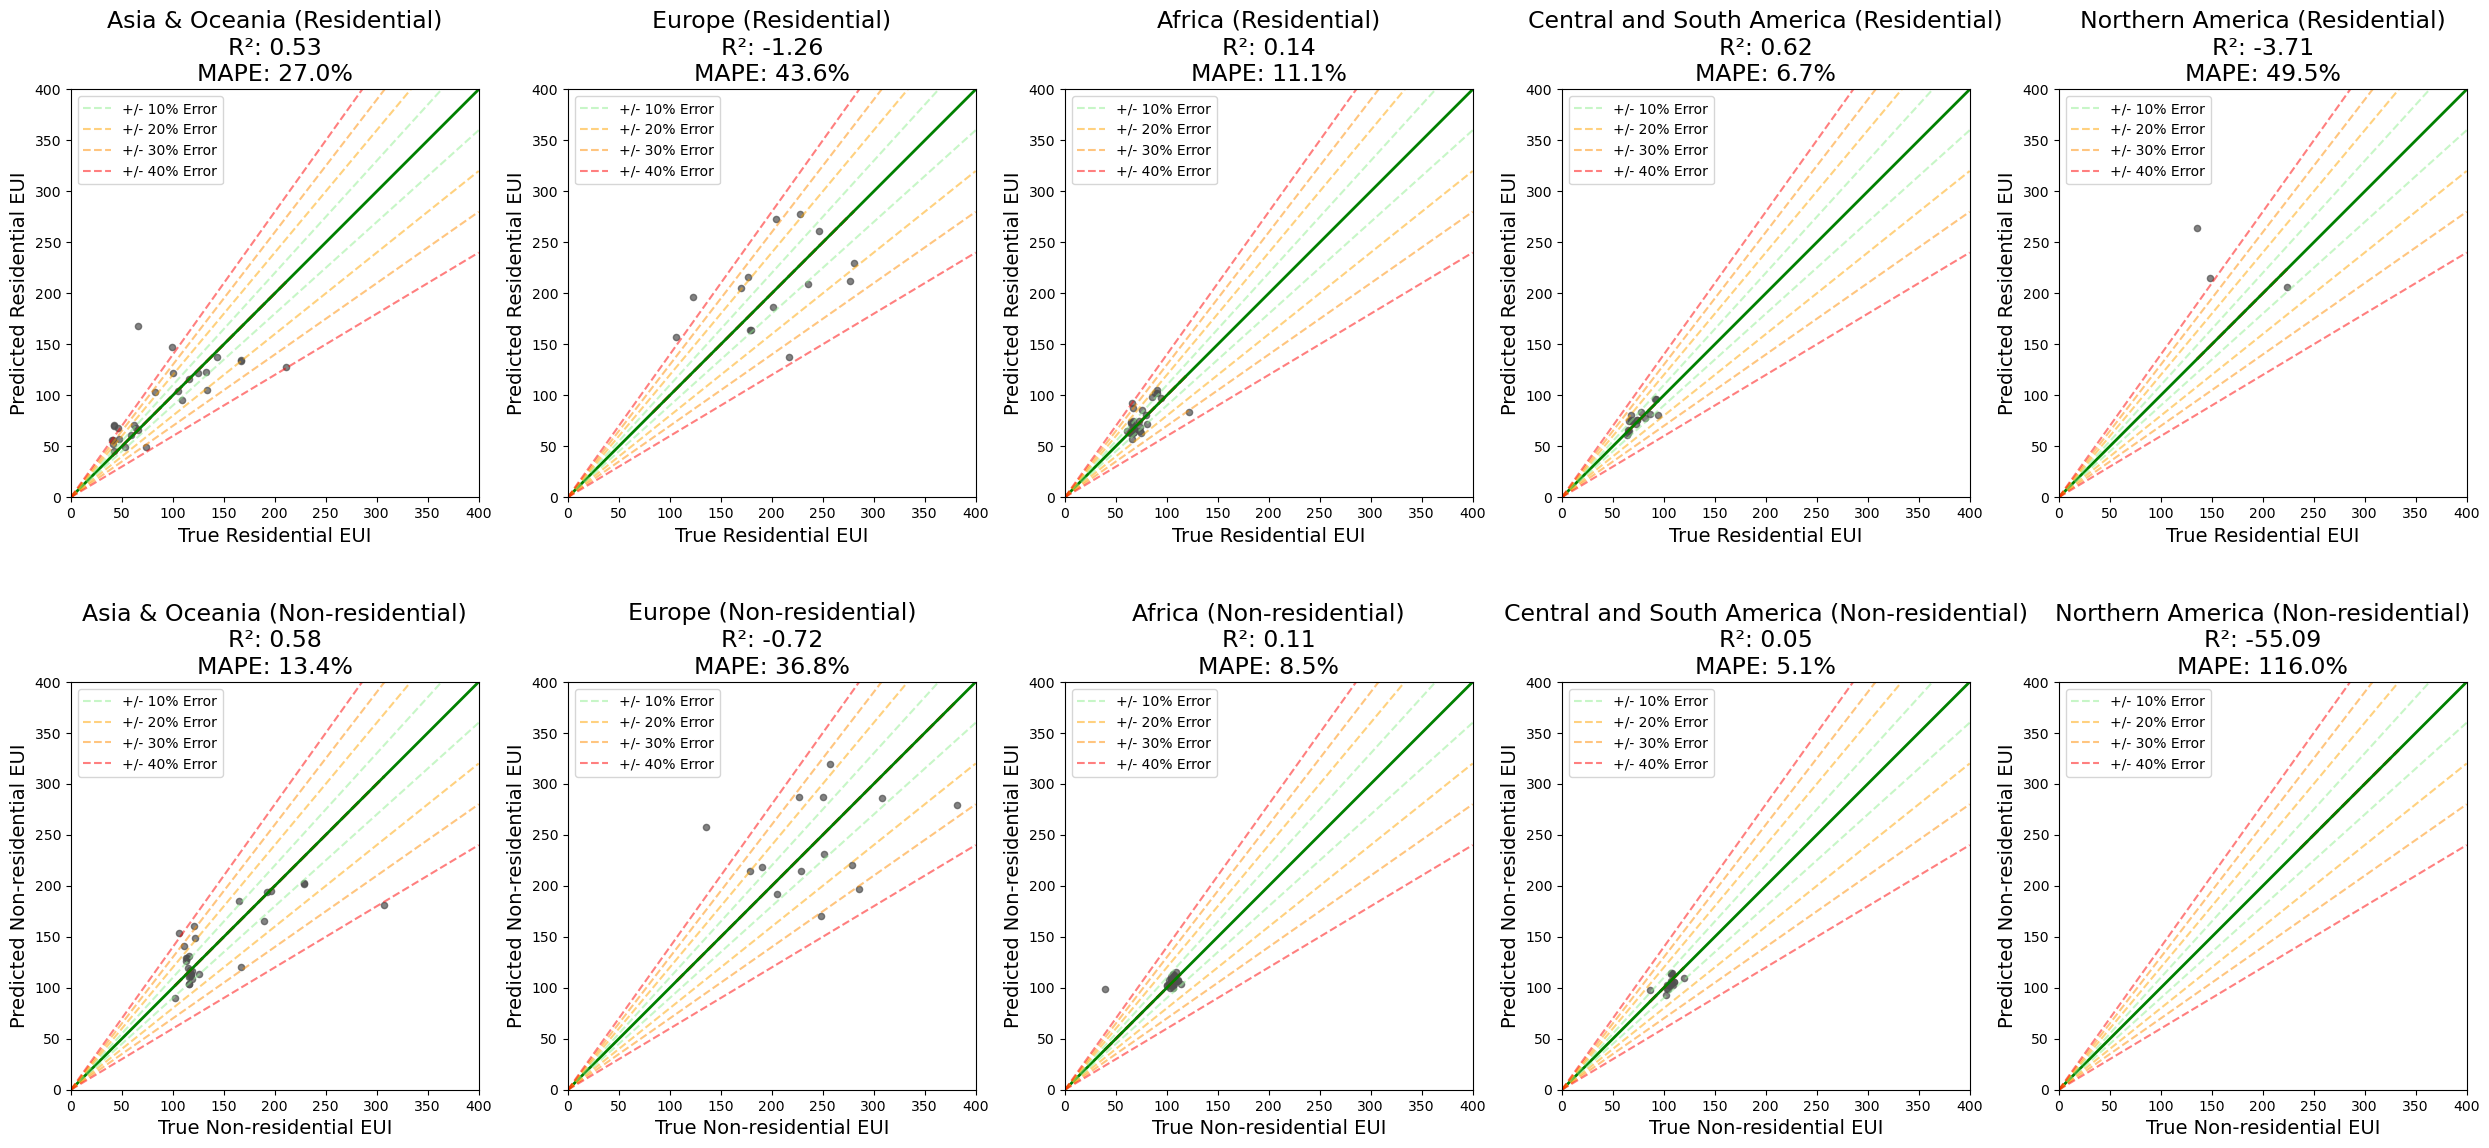

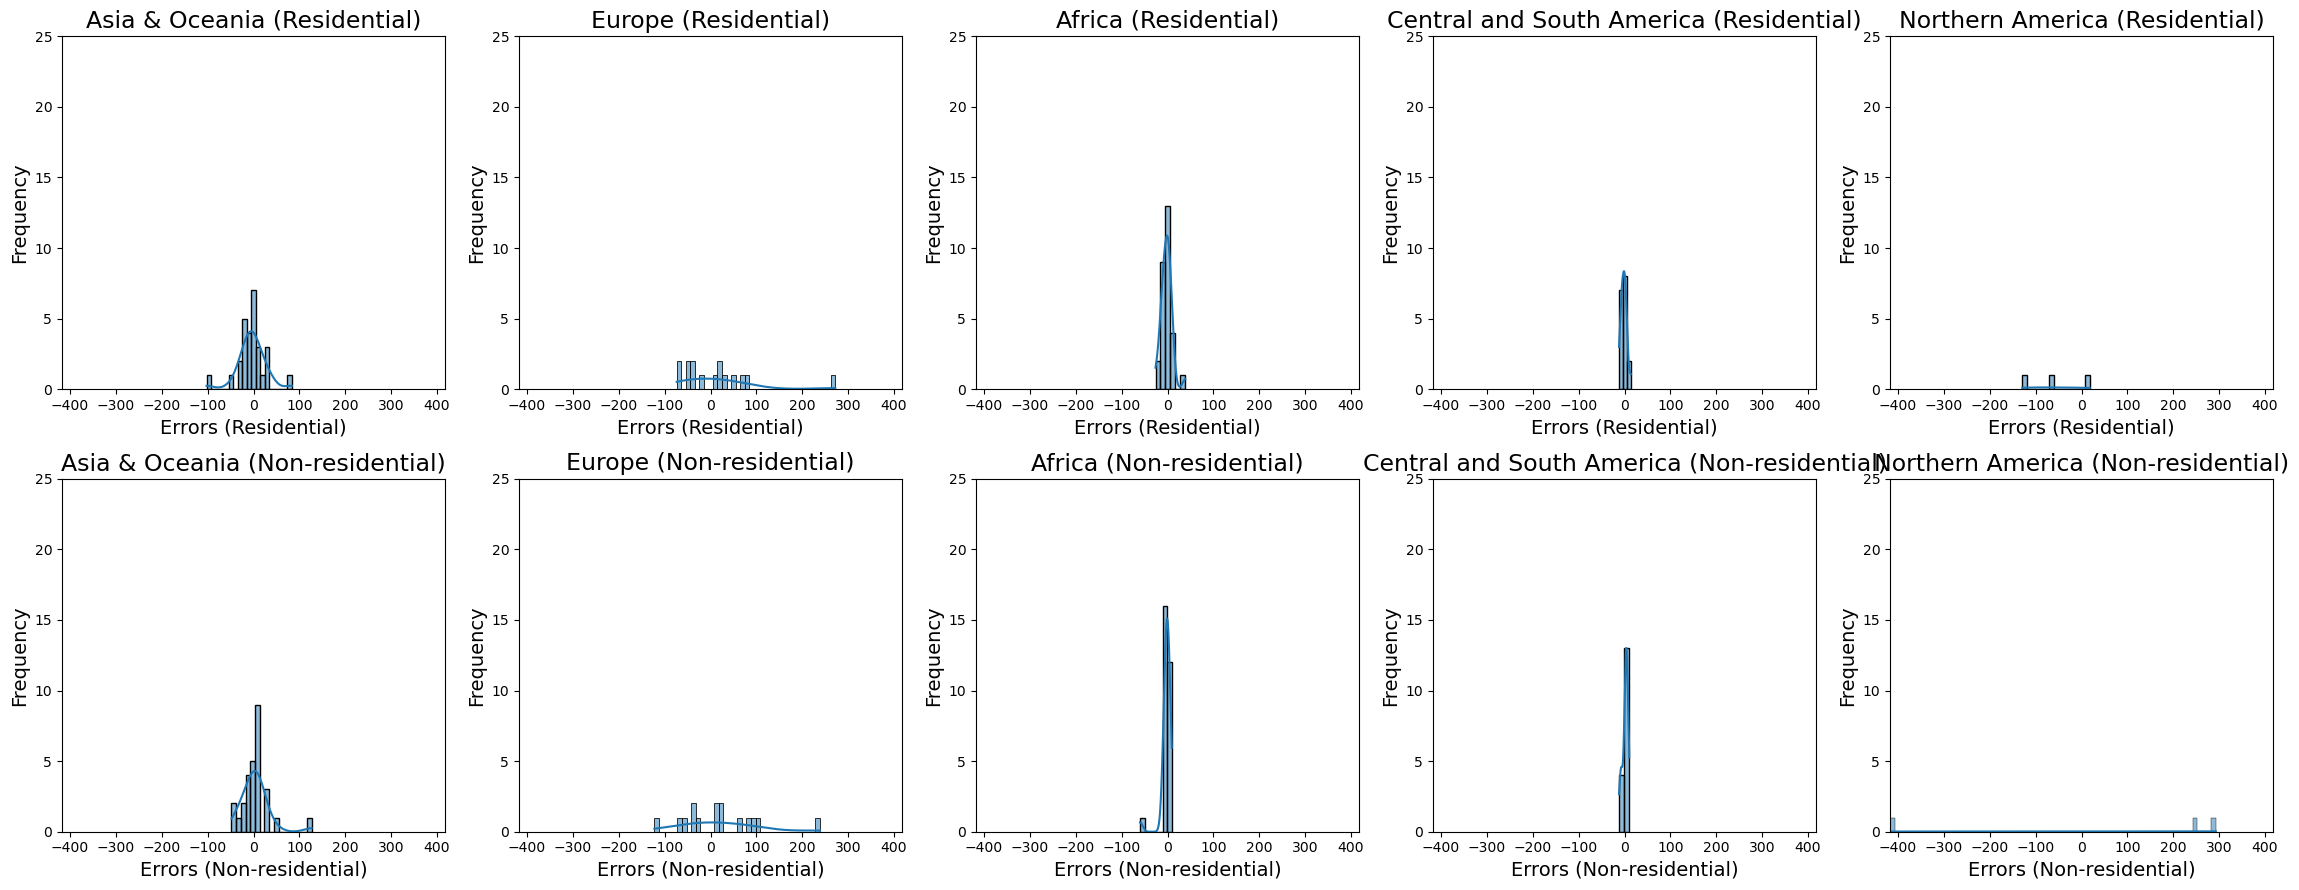

In [6]:
# Within-domain
model_lr_within = LinearRegression()
results_lr_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_lr_within,
    strategy='within_domain'
)

create_eui_comparison_plots(results_lr_within, 
    save_path='../figures/model_plots/lr_within_domain_eui_predictions.png')

create_error_distribution_plots(results_lr_within,
    save_path='../figures/model_plots/lr_within_domain_error_distribution.png')


### Linear Regression (Base Line Model) - Cross Domain

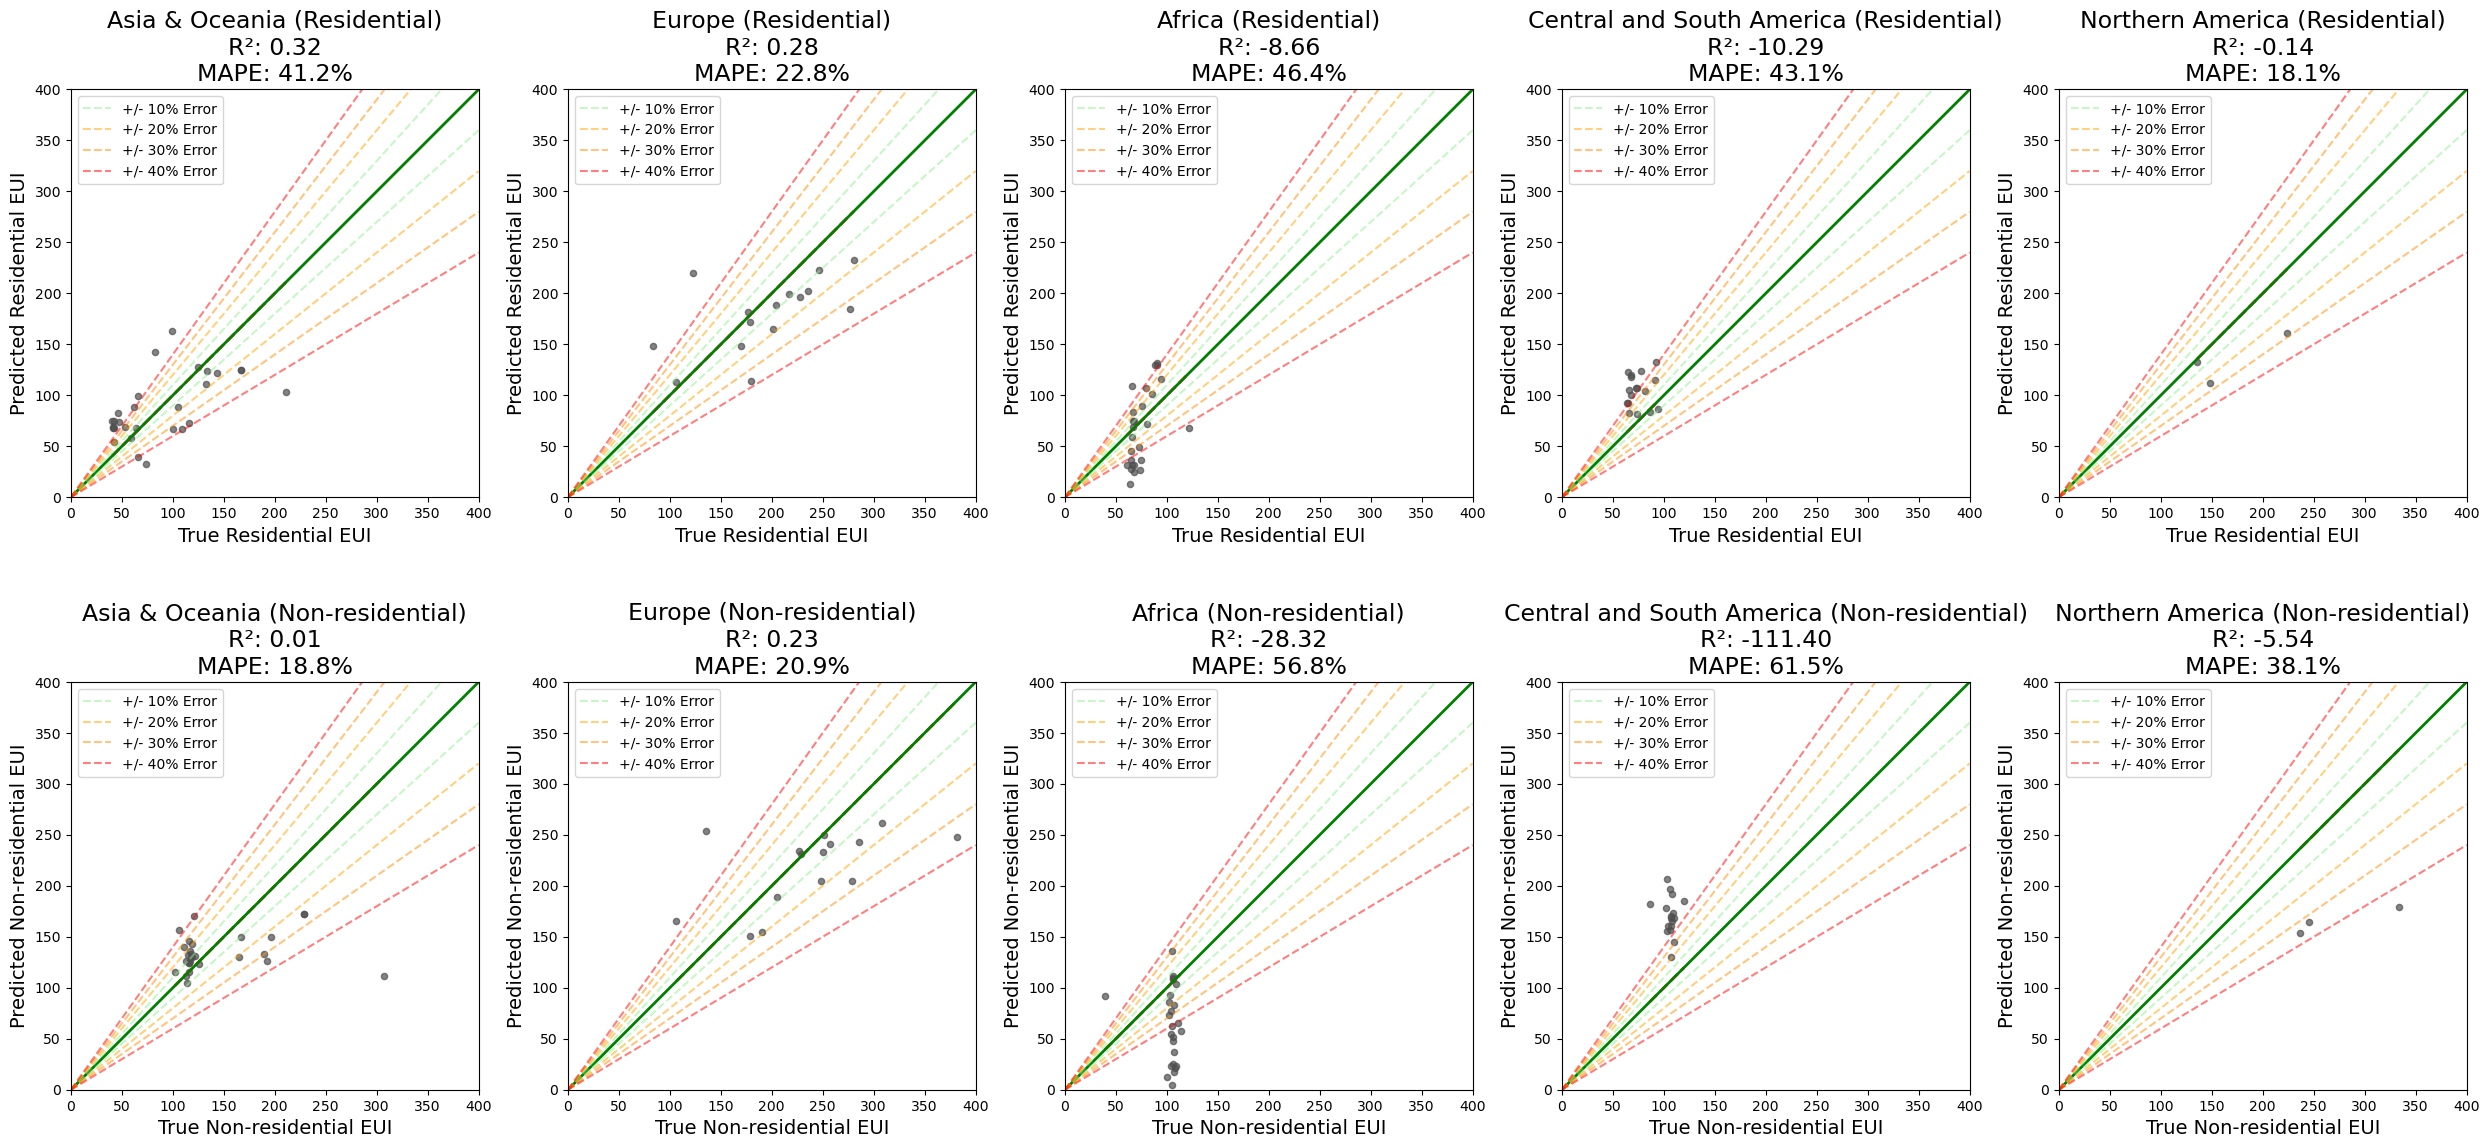

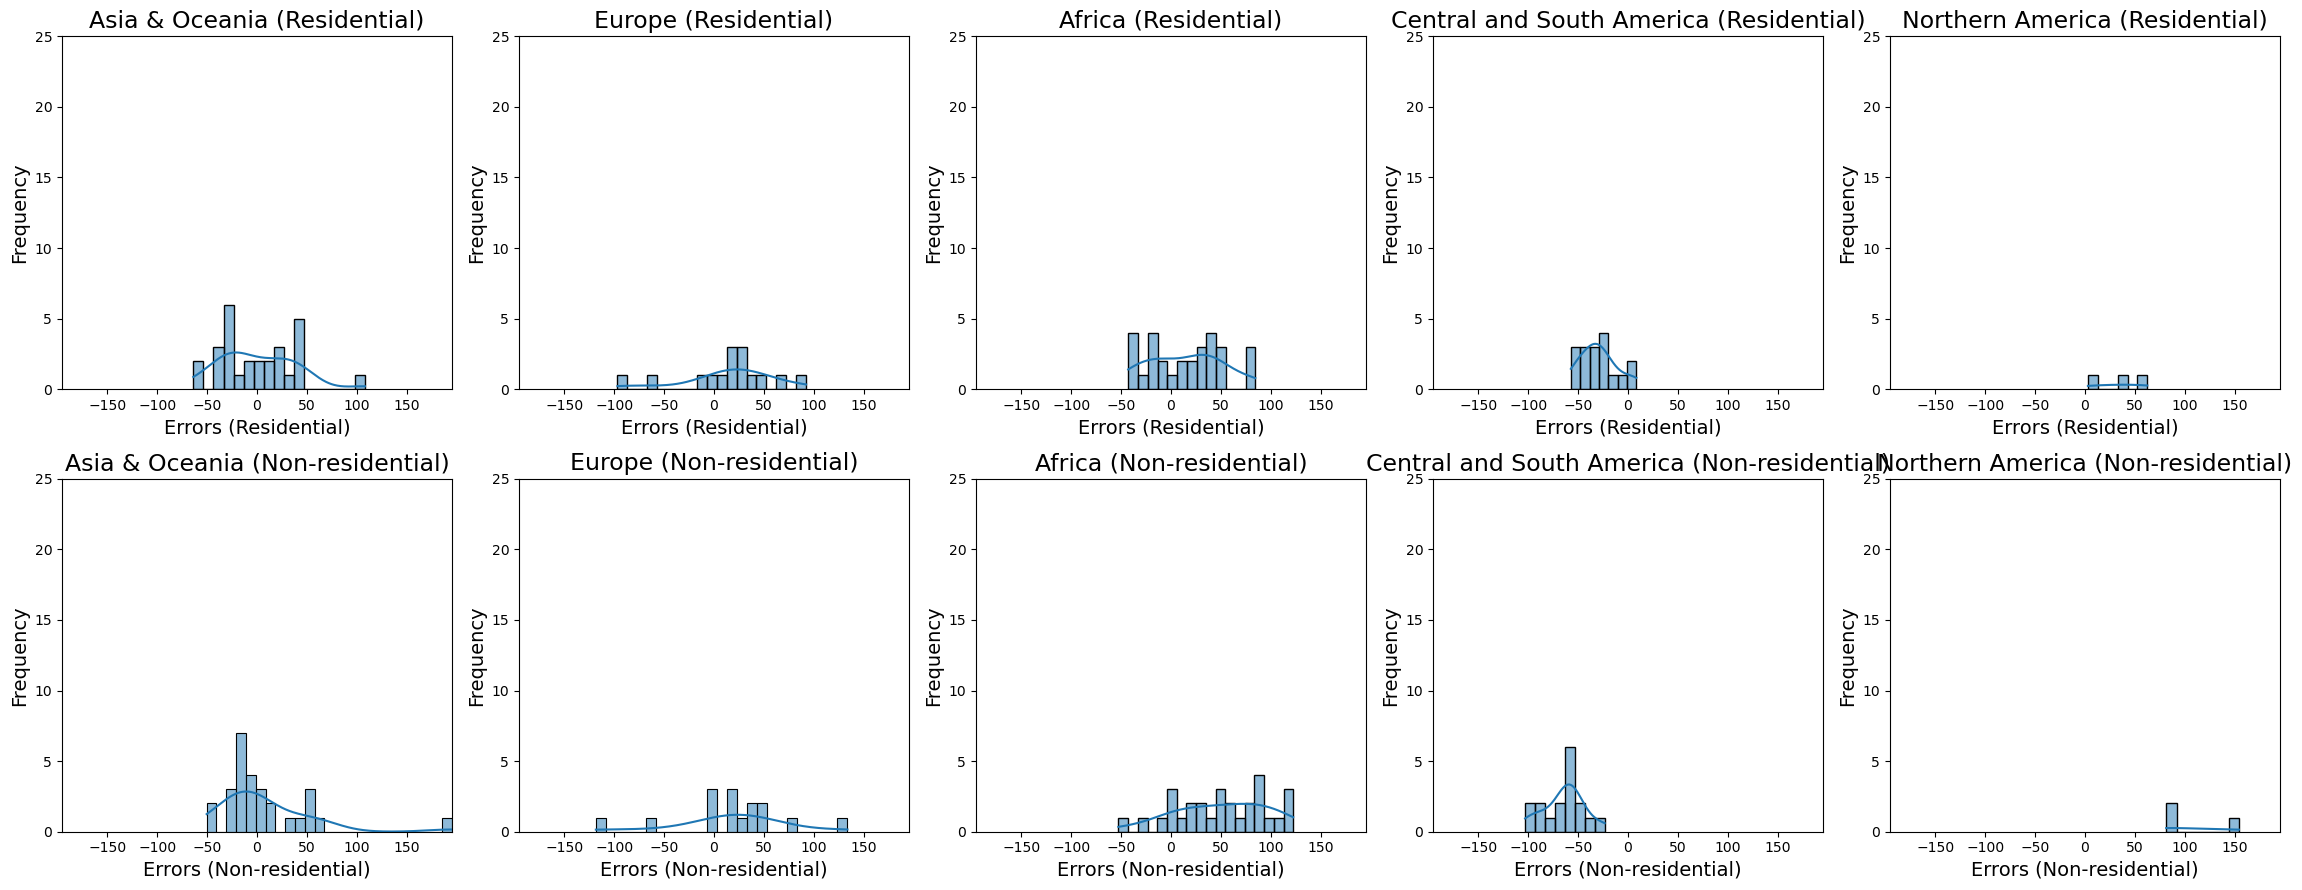

In [7]:
# Cross-domain 
model_lr_cross = LinearRegression()
results_lr_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_lr_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(results_lr_cross,
    save_path='../figures/model_plots/lr_cross_domain_eui_predictions.png')

create_error_distribution_plots(results_lr_cross,
    save_path='../figures/model_plots/lr_cross_domain_error_distribution.png')

### Linear Regression (Base Line Model) - All Domain

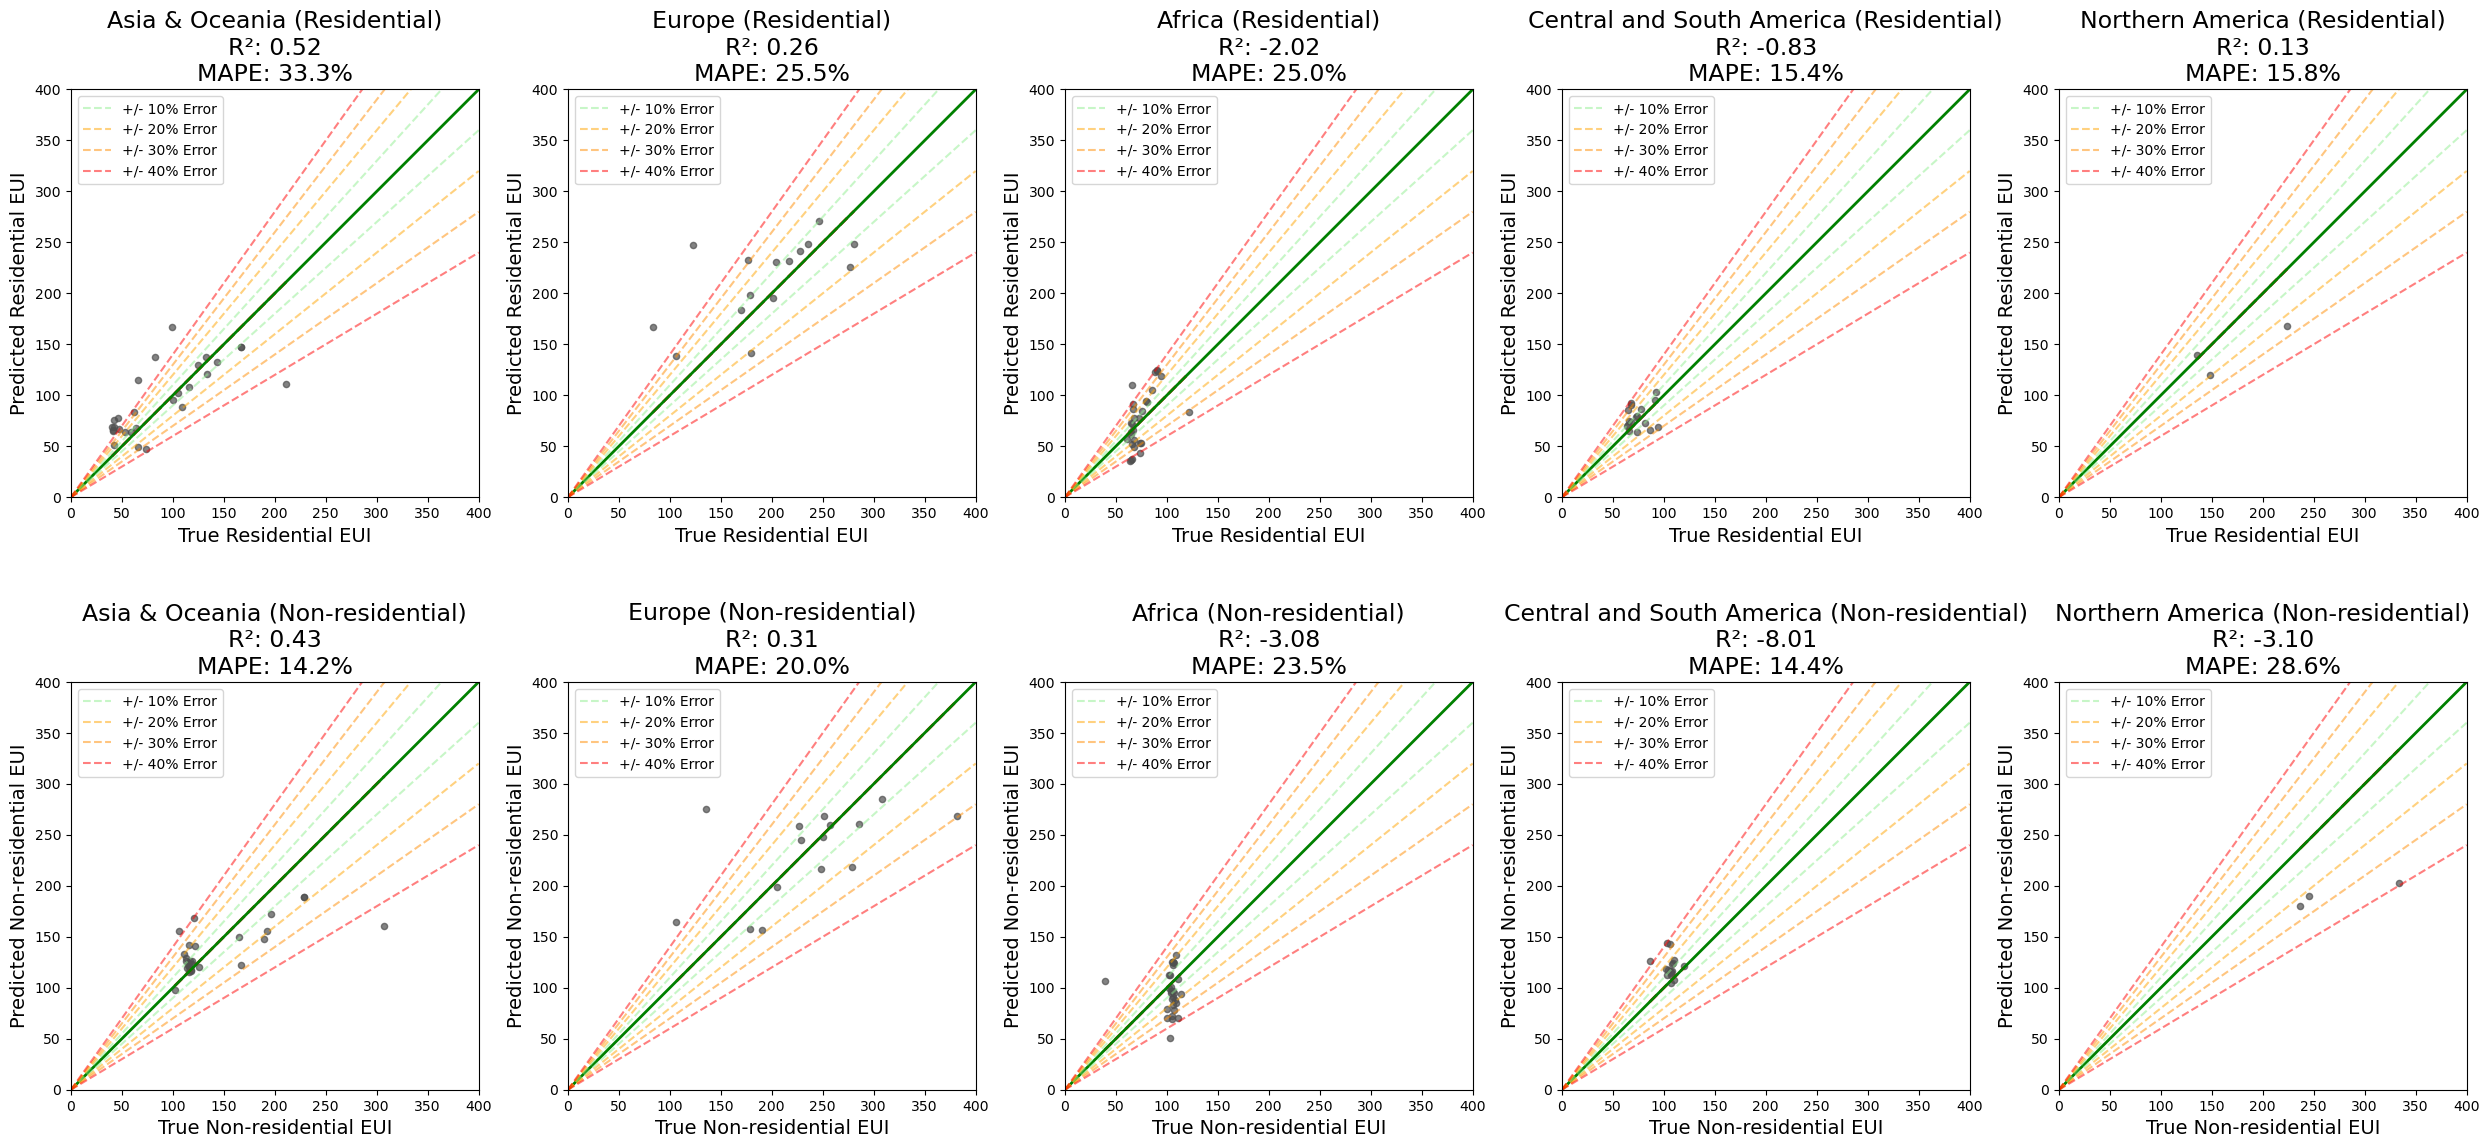

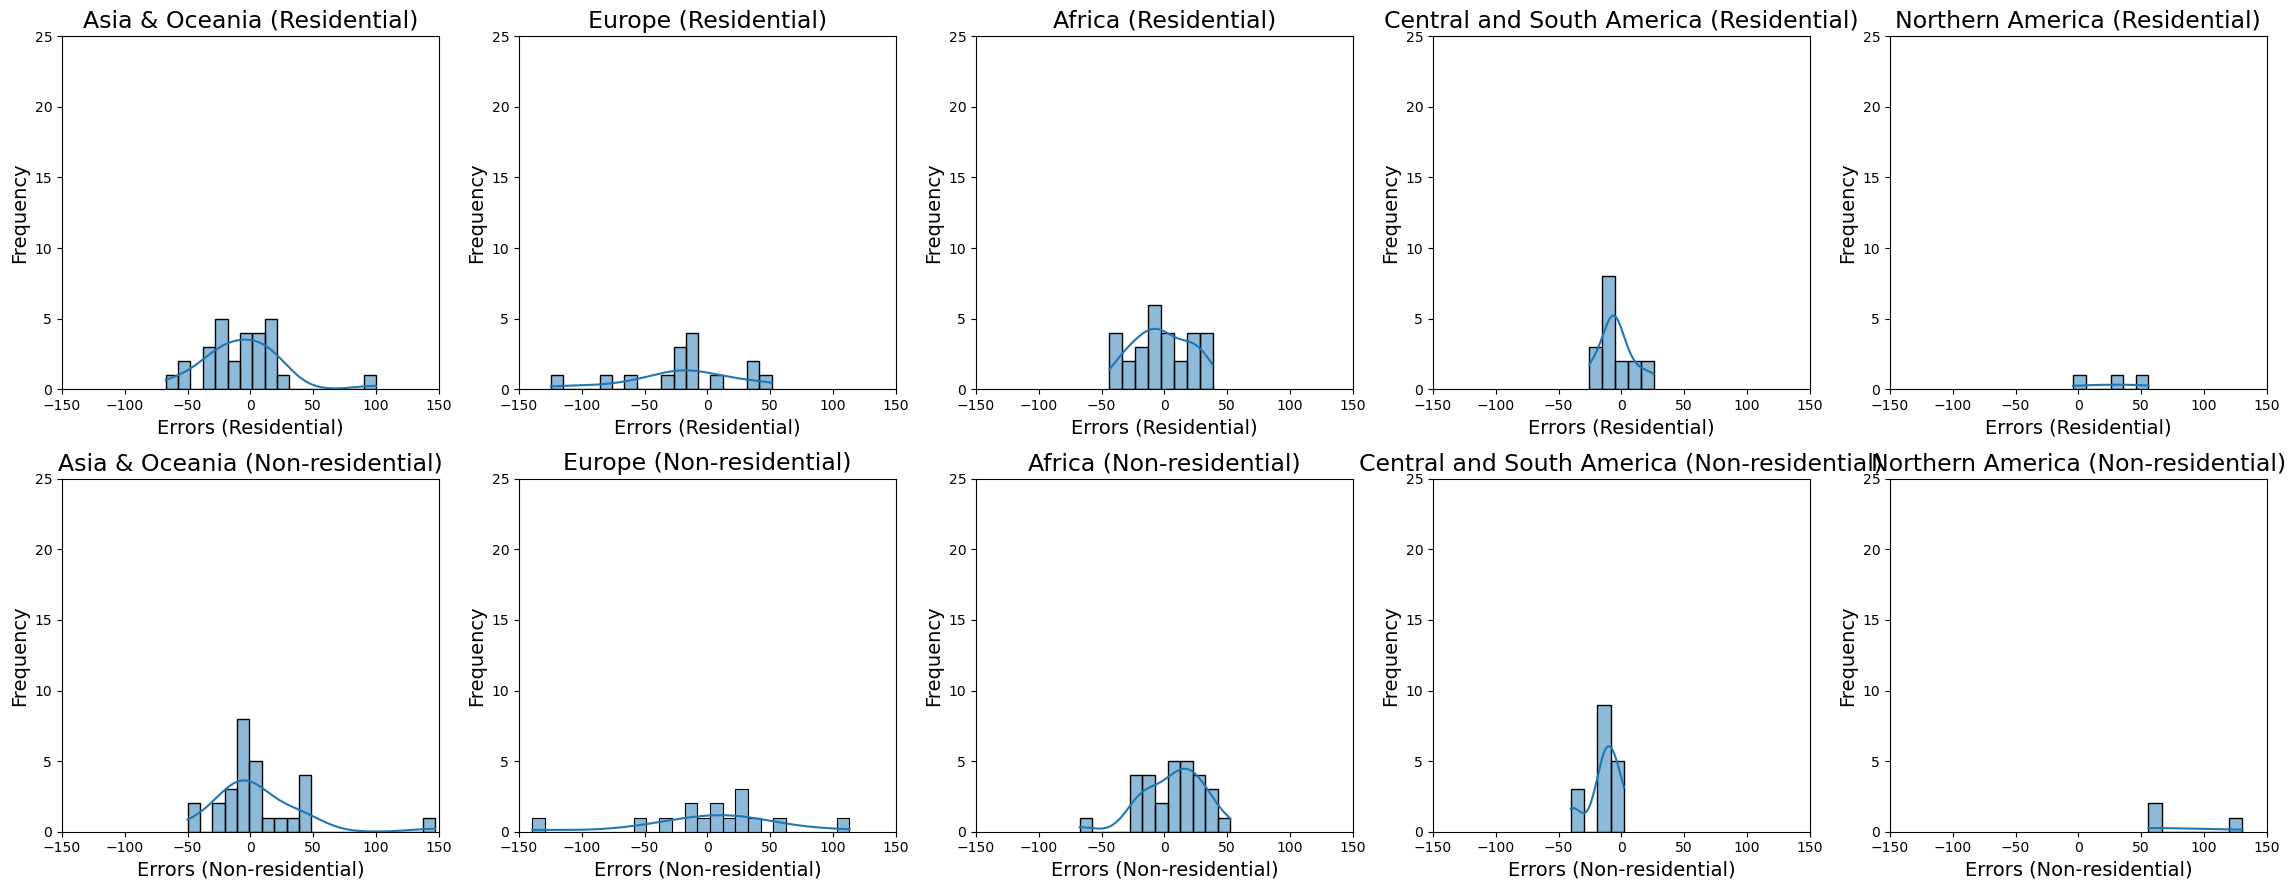

In [8]:
# All-domain
model_lr_all = LinearRegression()
results_lr_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_lr_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(results_lr_all,
    save_path='../figures/model_plots/lr_all_domain_eui_predictions.png')

create_error_distribution_plots(results_lr_all,
    save_path='../figures/model_plots/lr_all_domain_error_distribution.png')

In [9]:
lr_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=LinearRegression,
   feature_abbreviations=feature_abbreviations,
   model_details="No regularization"
)

lr_average_results = calculate_average_metrics(lr_detailed_results).reset_index()
lr_average_results

Target       Strategy             Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LinearRegression   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LinearRegression   
2  Non-residential EUI (kWh/m2/year)     all_domain  LinearRegression   
3      Residential EUI (kWh/m2/year)  within_domain  LinearRegression   
4      Residential EUI (kWh/m2/year)   cross_domain  LinearRegression   
5      Residential EUI (kWh/m2/year)     all_domain  LinearRegression   

       Model Details                                      Features Used  \
0  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
1  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
2  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
3  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
4  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
5  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   

                                Features Abbreviated   MAPE      R²  \
0  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  35.96 -11.016   
1  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  39.22 -29.004   
2  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  20.14  -2.690   
3  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  27.58  -0.738   
4  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  34.32  -3.699   
5  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  23.00  -0.388   

         MSE    RMSE     MAE   WAPE  
0  23059.332  92.521  82.972  33.88  
1   5449.081  70.553  60.275  38.92  
2   2627.260  44.810  35.737  19.30  
3   3087.253  43.710  32.765  22.82  
4   1644.541  40.321  33.530  32.34  
5   1068.497  30.513  24.106  20.84

In [10]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
lr_detailed_results.to_csv(f'../results/{timestamp}_lr_detailed_results.csv')
lr_average_results.to_csv(f'../results/{timestamp}_lr_average_results.csv')

# 

# Linear Regression - Ridge regularization

In [11]:
ridge_params = {
    'alpha': 1.0,          # regularization strength
   # 'fit_intercept': True, # include bias term
   # 'max_iter': 1000,      # maximum iterations
   # 'tol': 1e-3,          # tolerance for optimization
   # 'solver': 'auto',      # solver algorithm
   # 'random_state': 42     # for reproducibility
}

### Linear Regression - Ridge - Within Domain

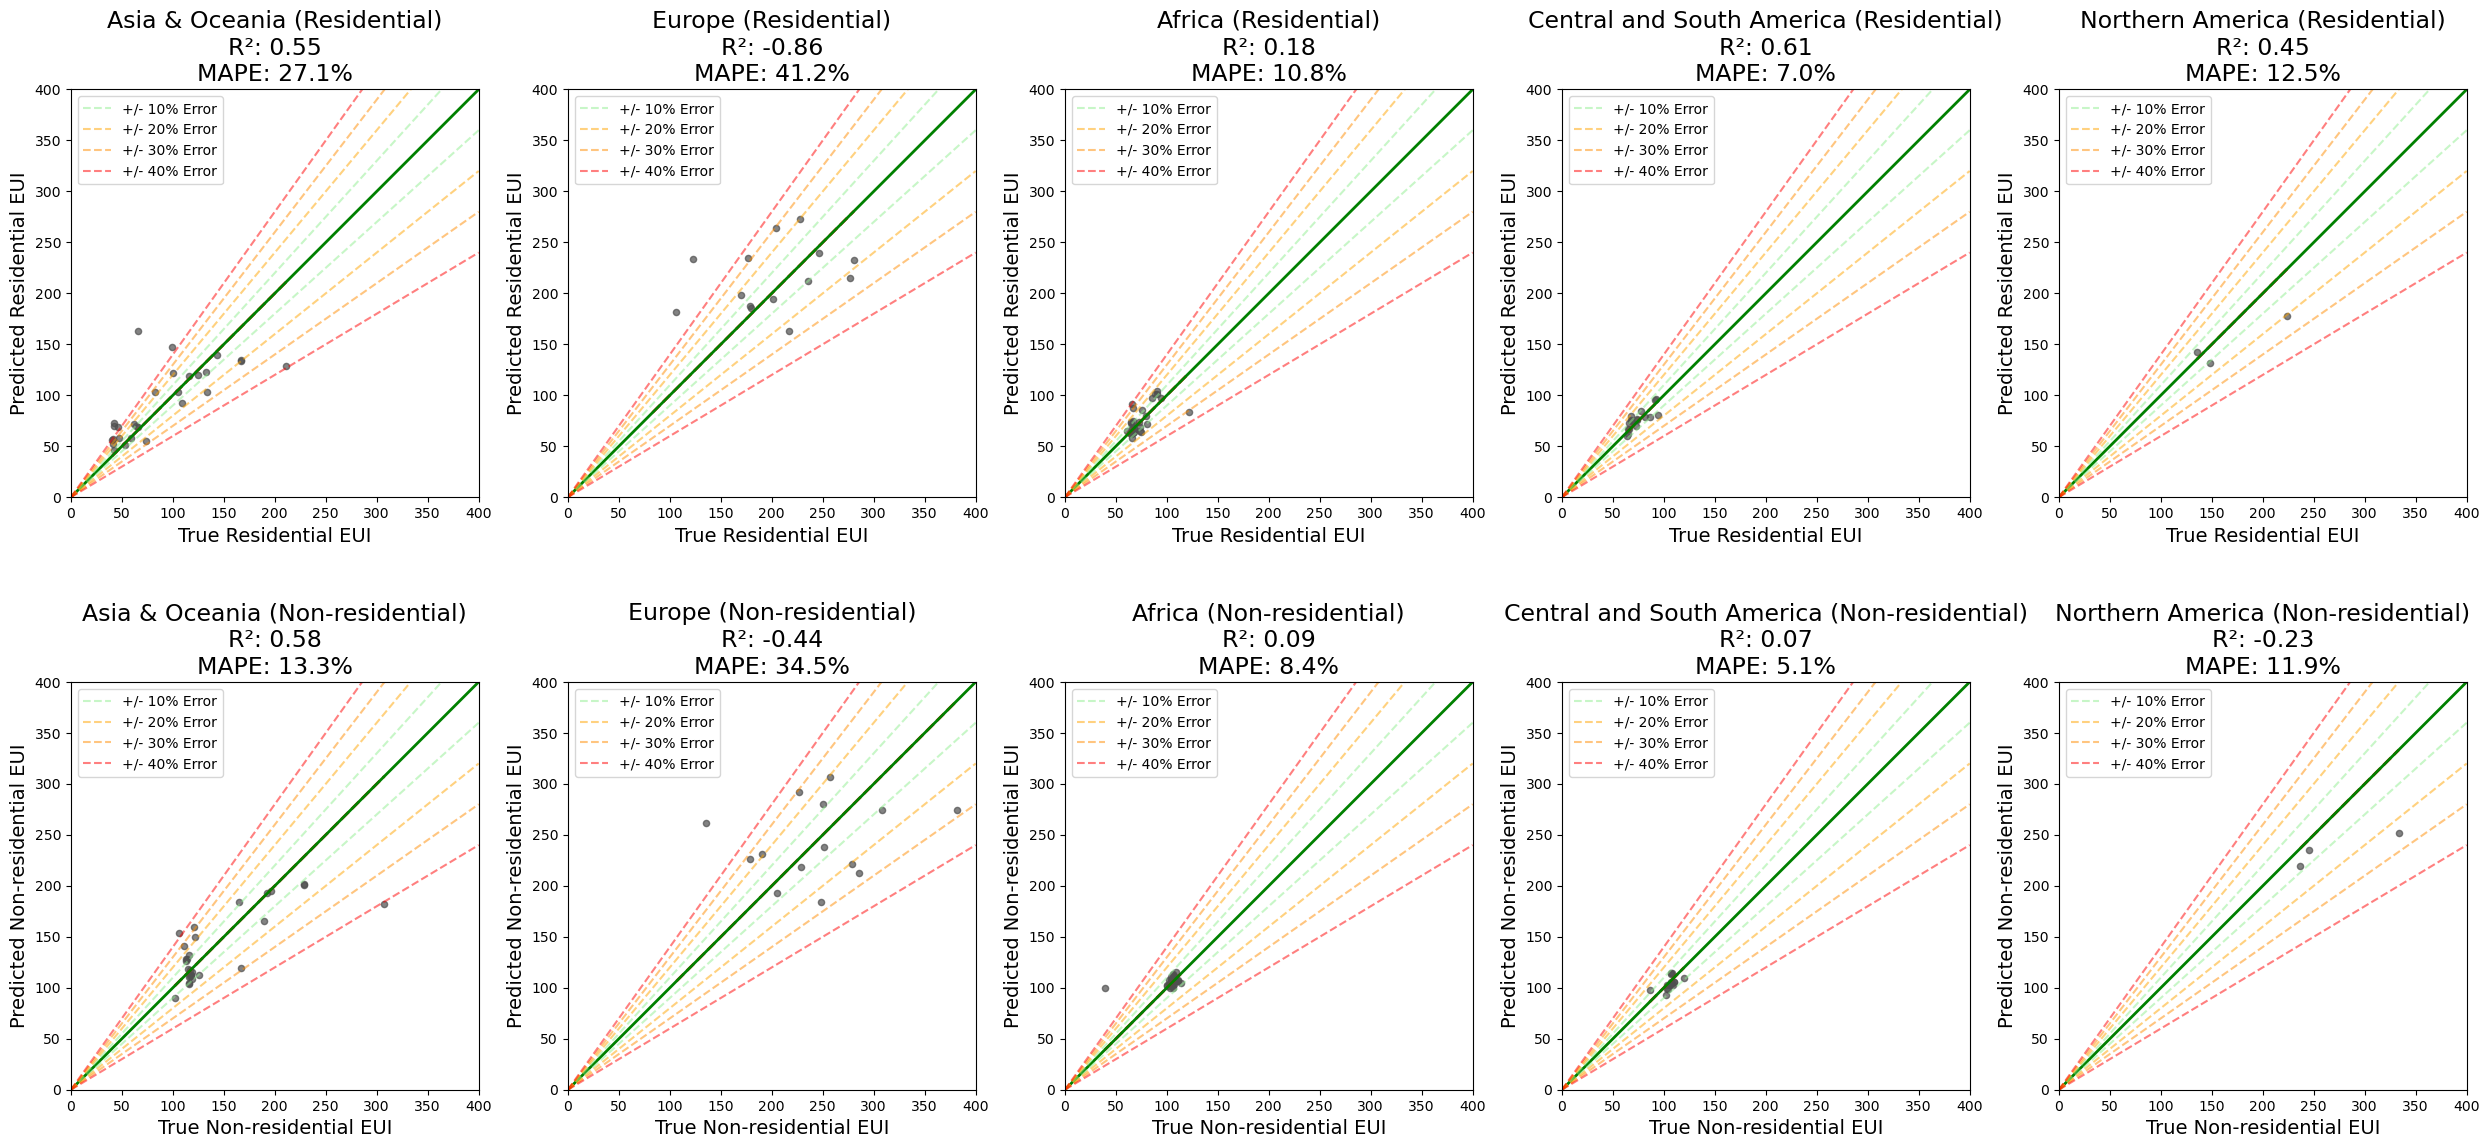

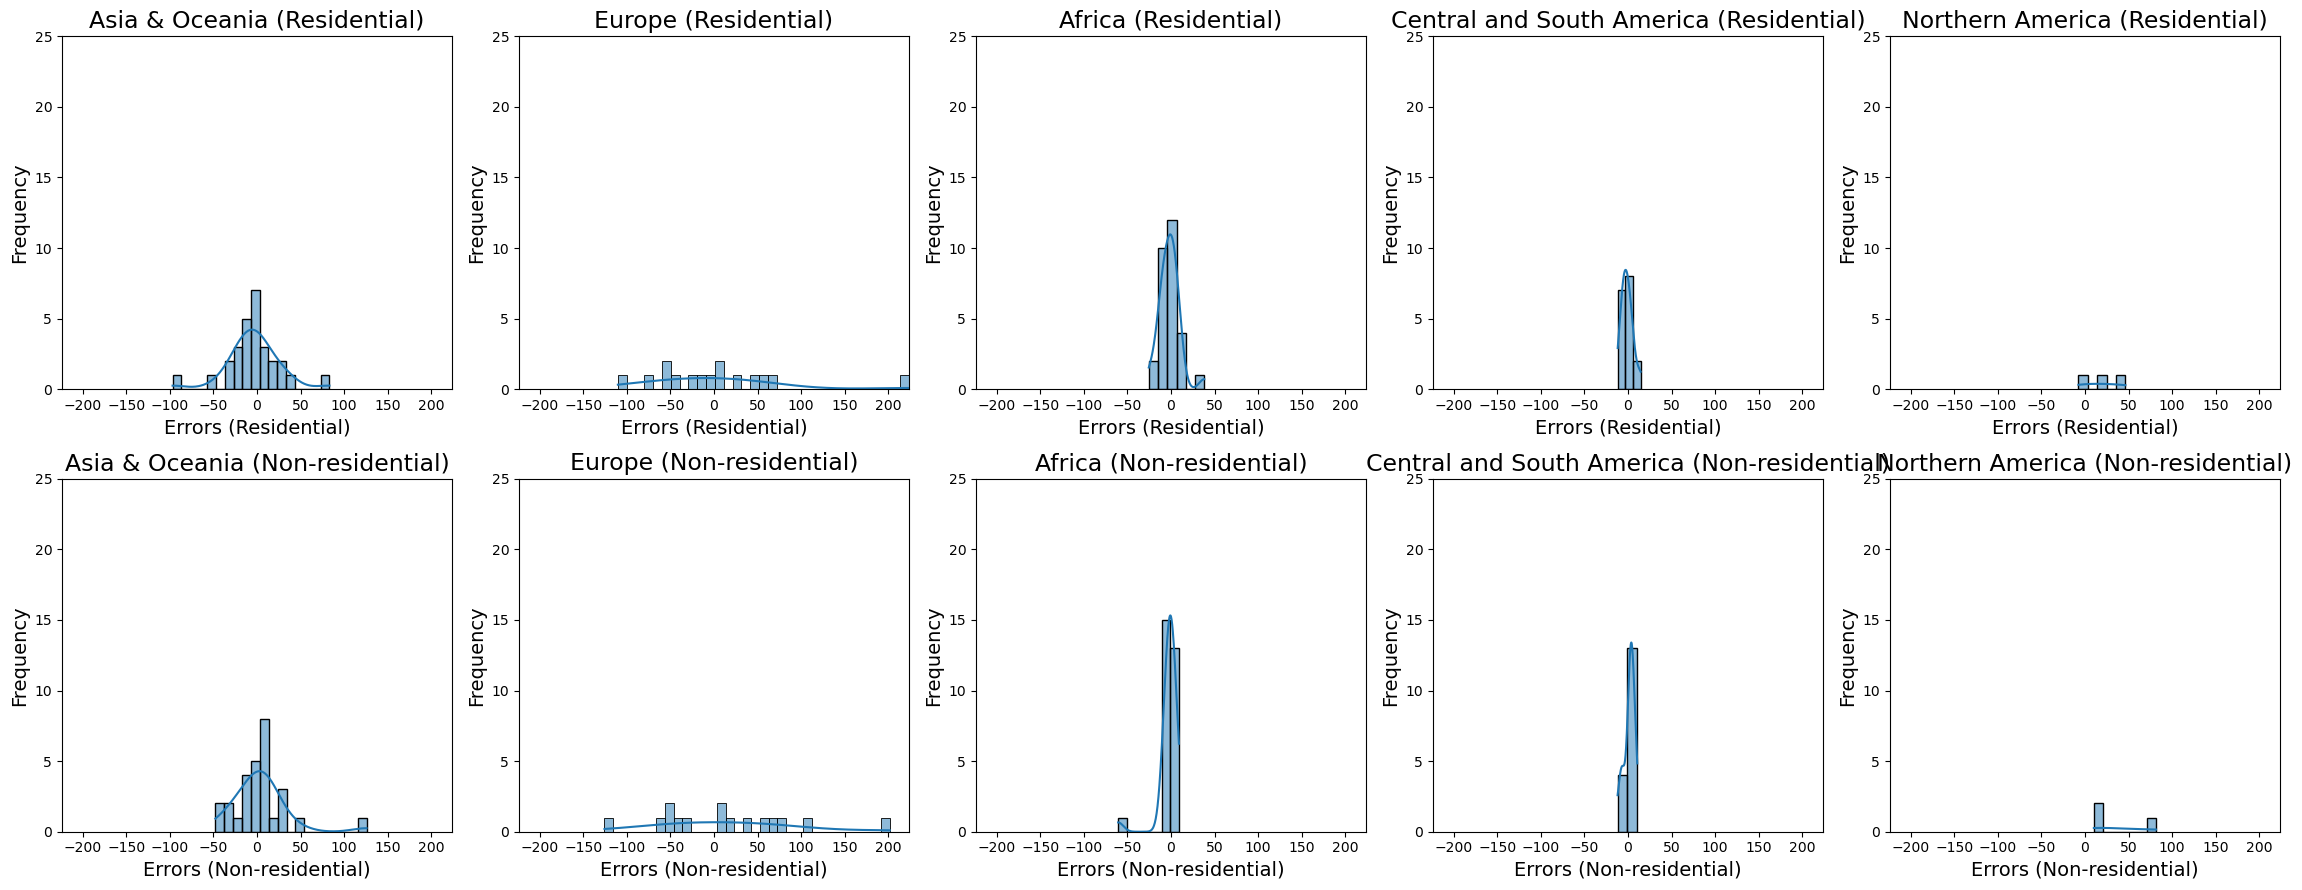

In [12]:
# Within-domain with Ridge
model_ridge_within = Ridge(**ridge_params)
results_ridge_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_ridge_within,
    strategy='within_domain'
)

create_eui_comparison_plots(results_ridge_within, 
    save_path='../figures/model_plots/ridge_within_domain_eui_predictions.png')

create_error_distribution_plots(results_ridge_within,
    save_path='../figures/model_plots/ridge_within_domain_error_distribution.png')

### Linear Regression - Ridge - Cross Domain

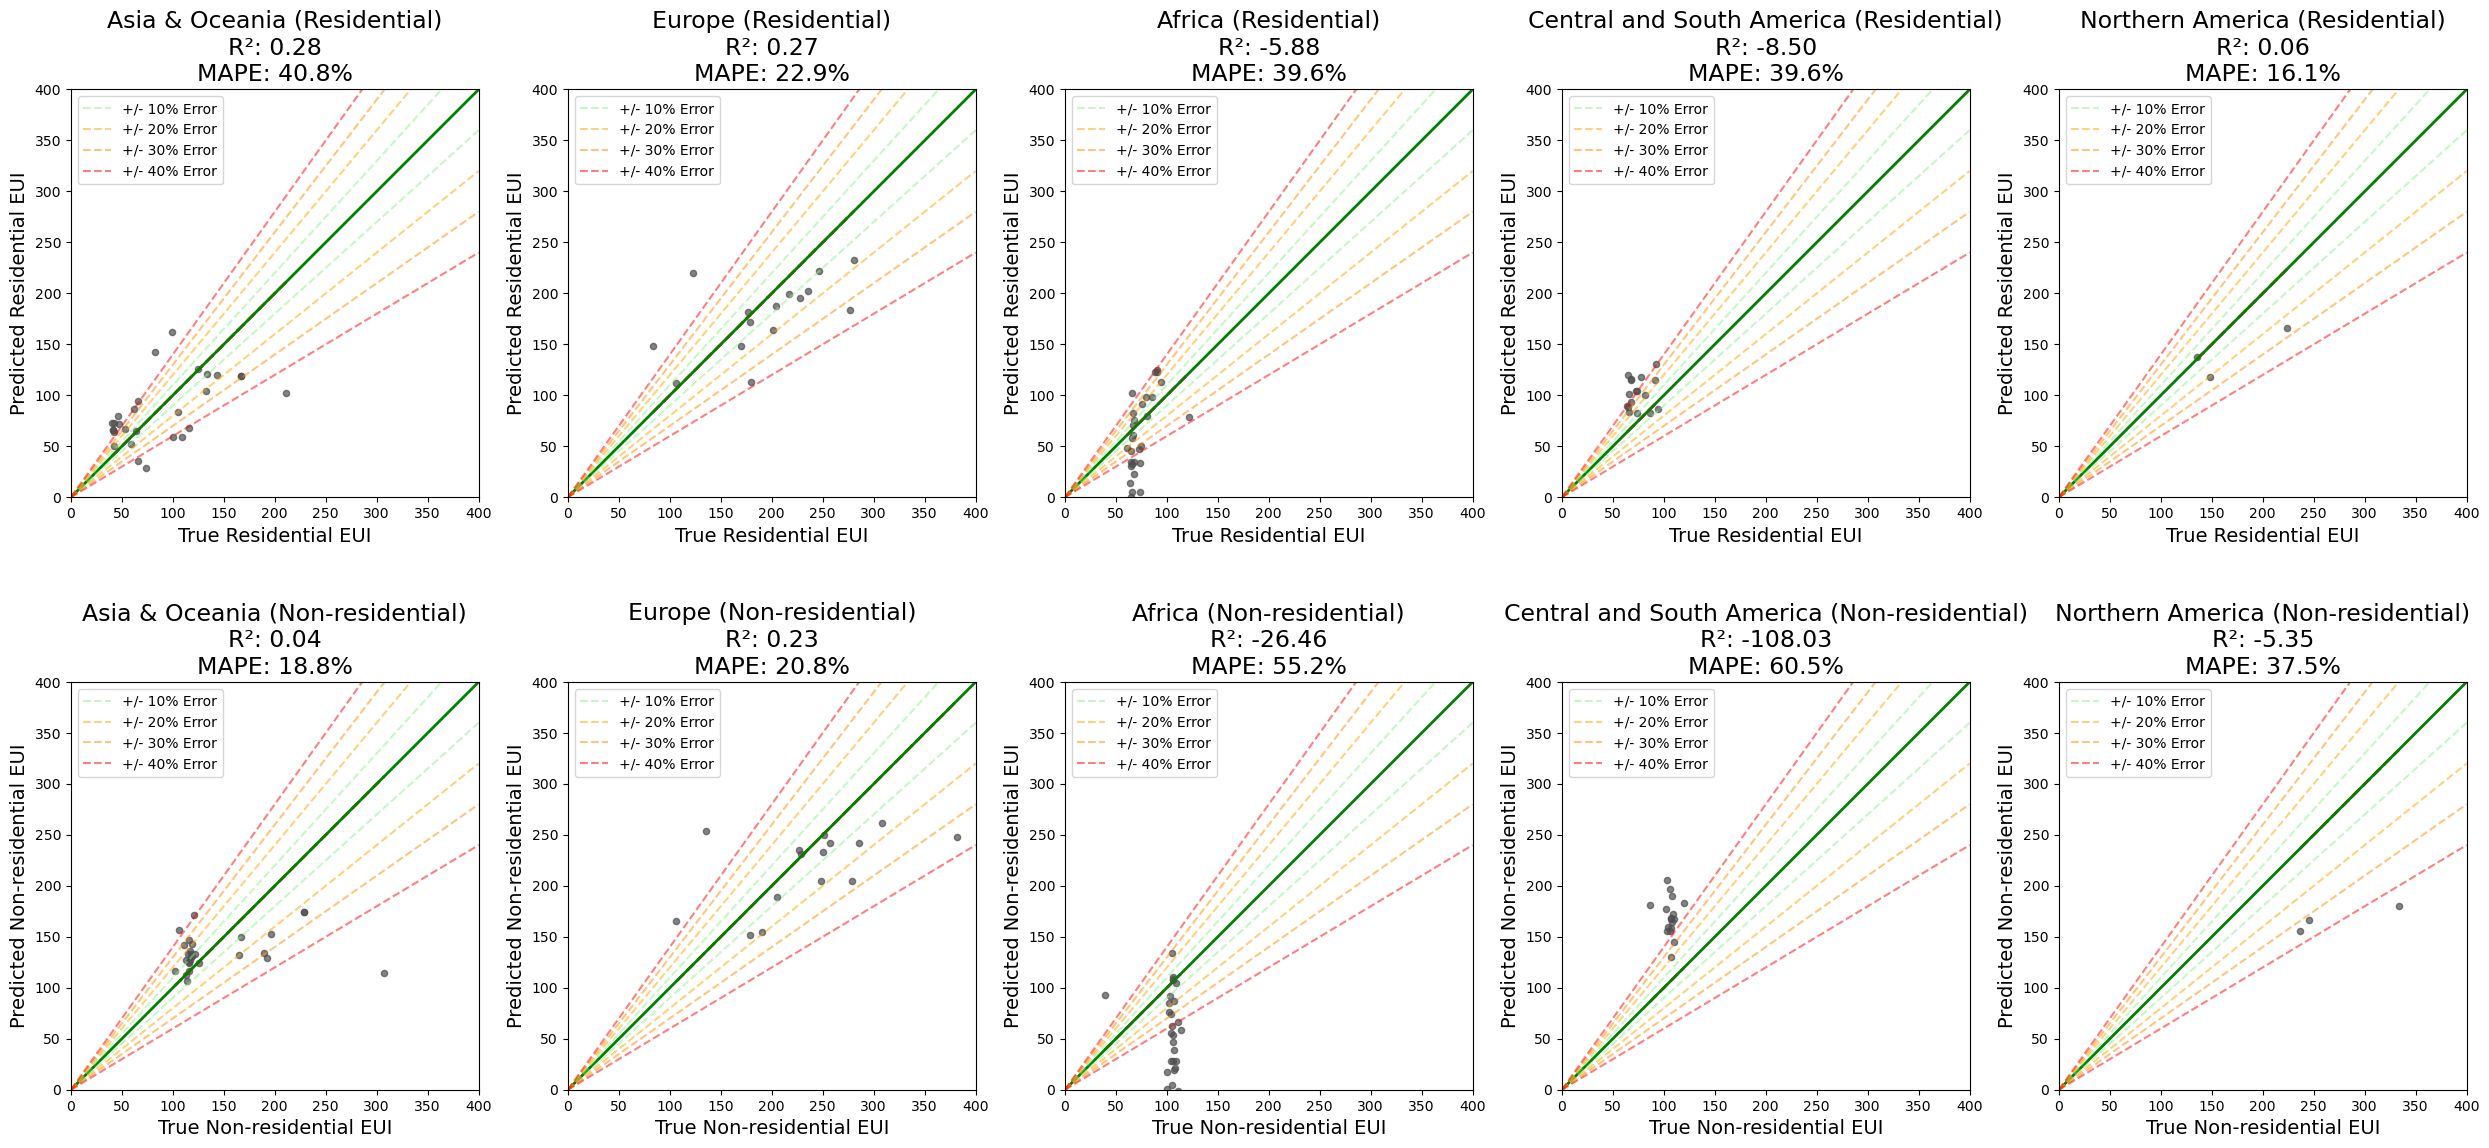

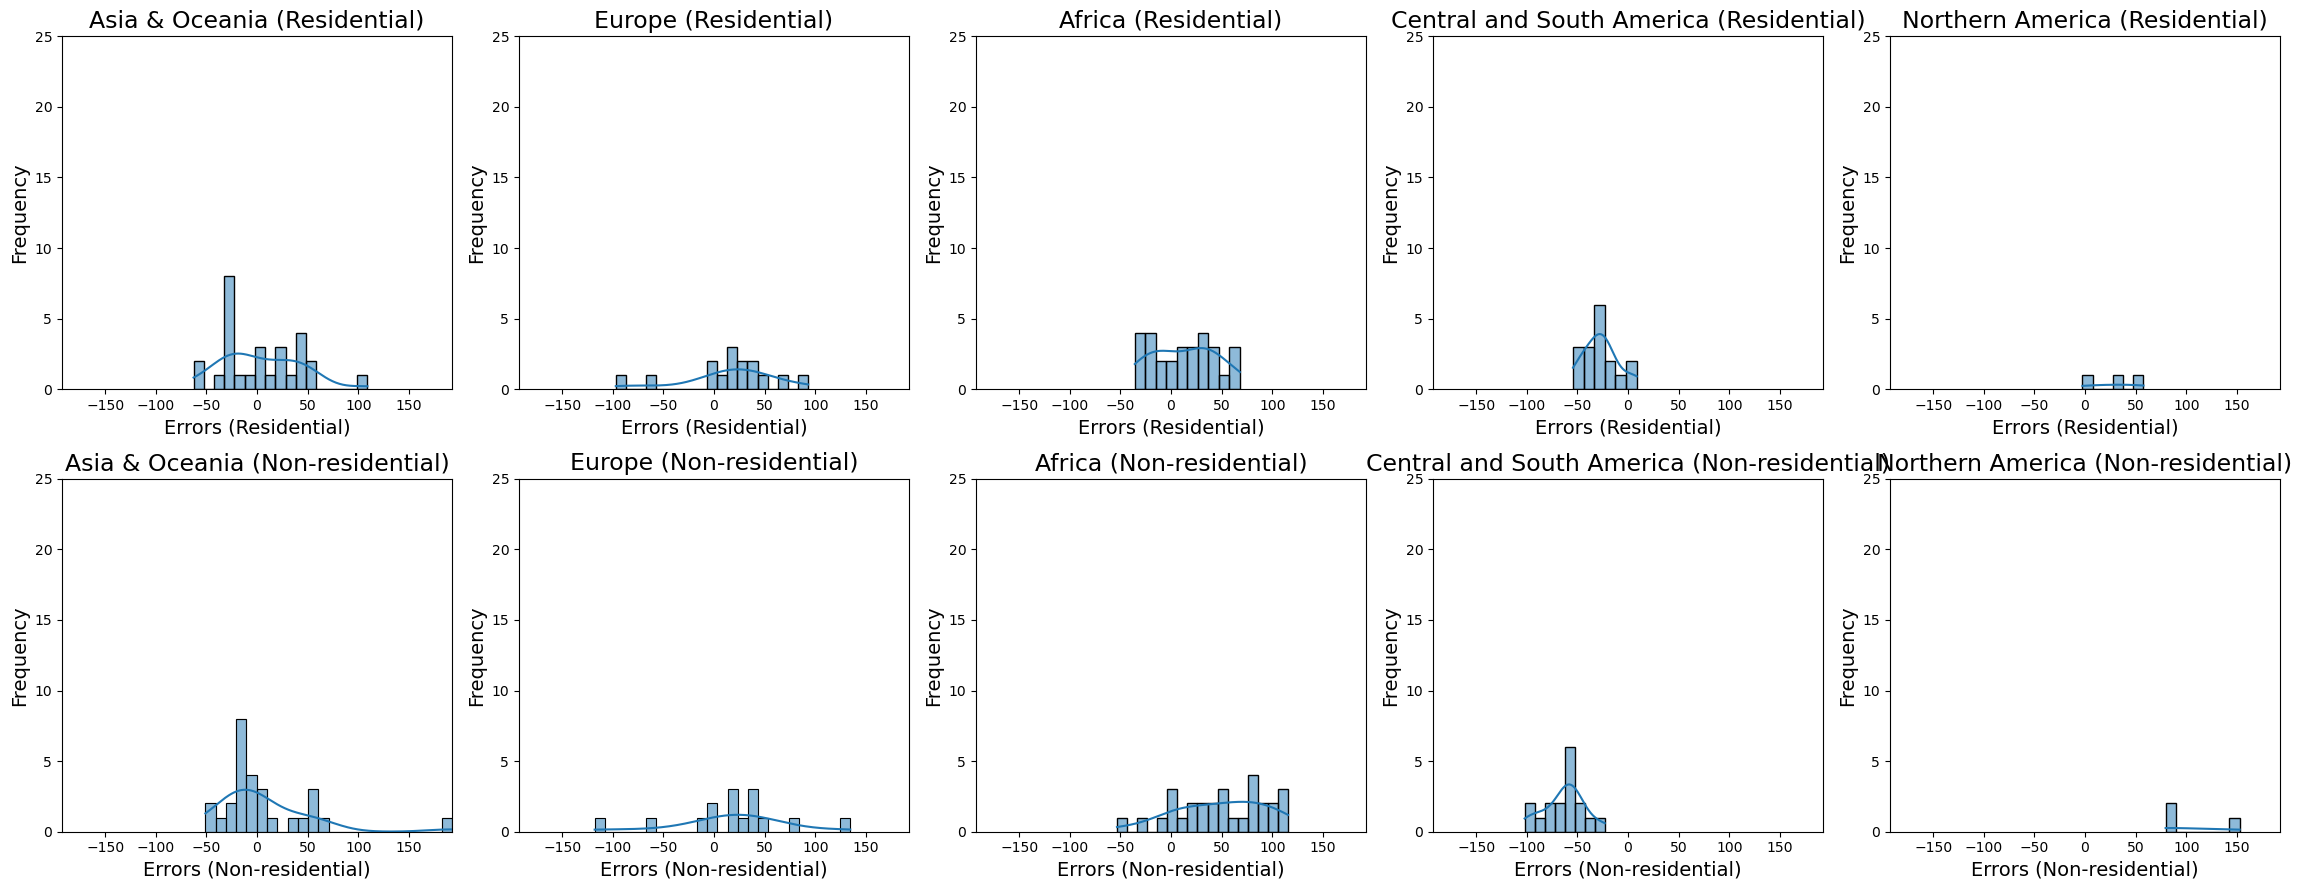

In [13]:
# Cross-domain with Ridge
model_ridge_cross = Ridge(**ridge_params)
results_ridge_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_ridge_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(results_ridge_cross,
    save_path='../figures/model_plots/ridge_cross_domain_eui_predictions.png')

create_error_distribution_plots(results_ridge_cross,
    save_path='../figures/model_plots/ridge_cross_domain_error_distribution.png')


### Linear Regression - Ridge - All Domain

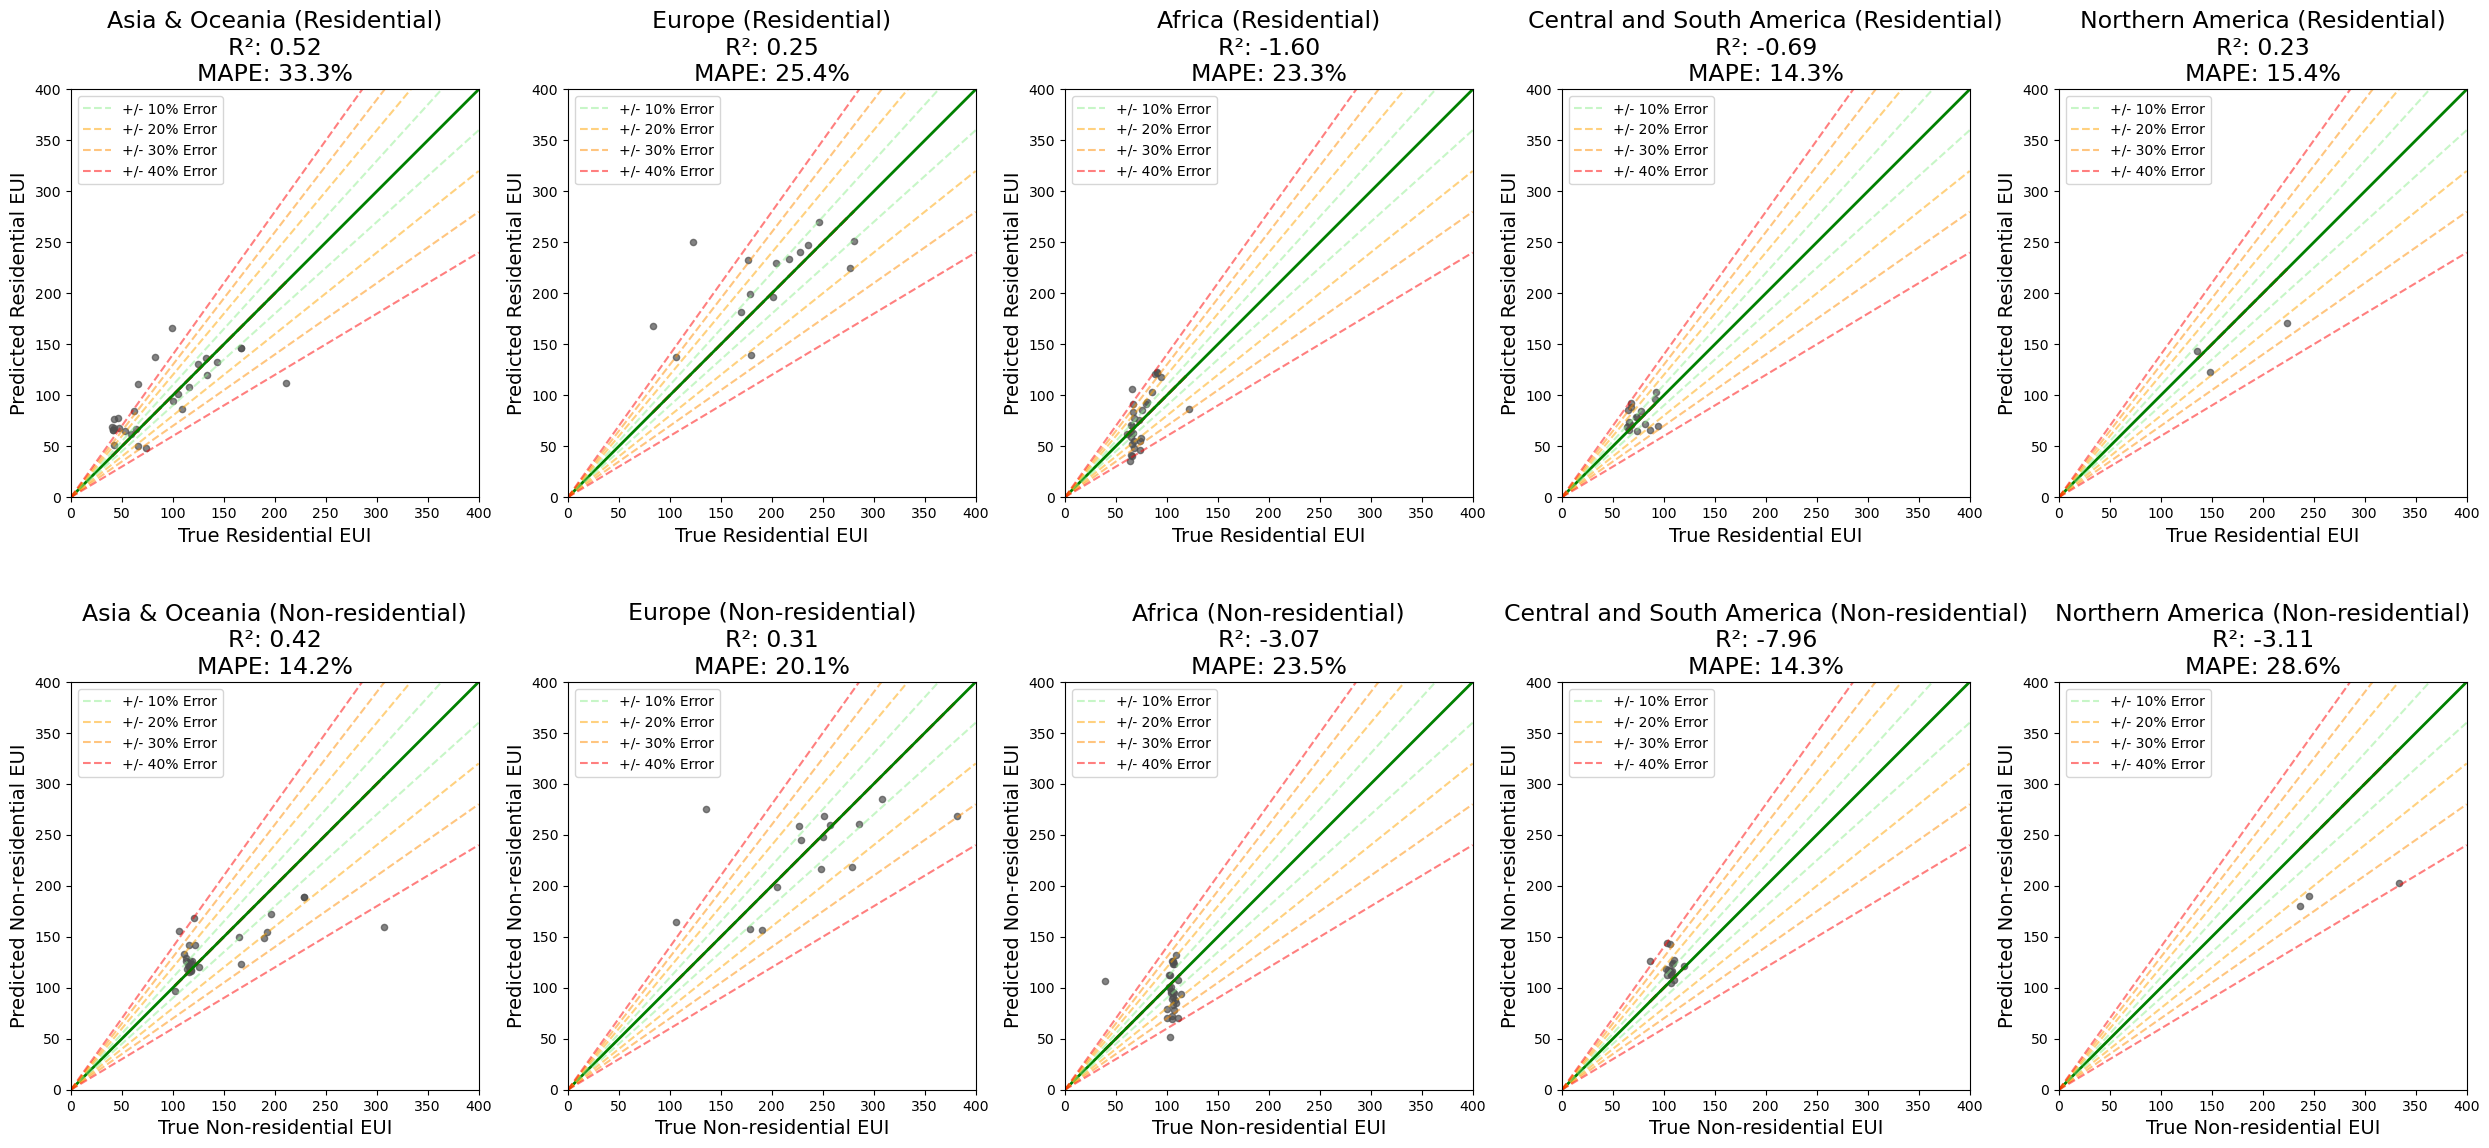

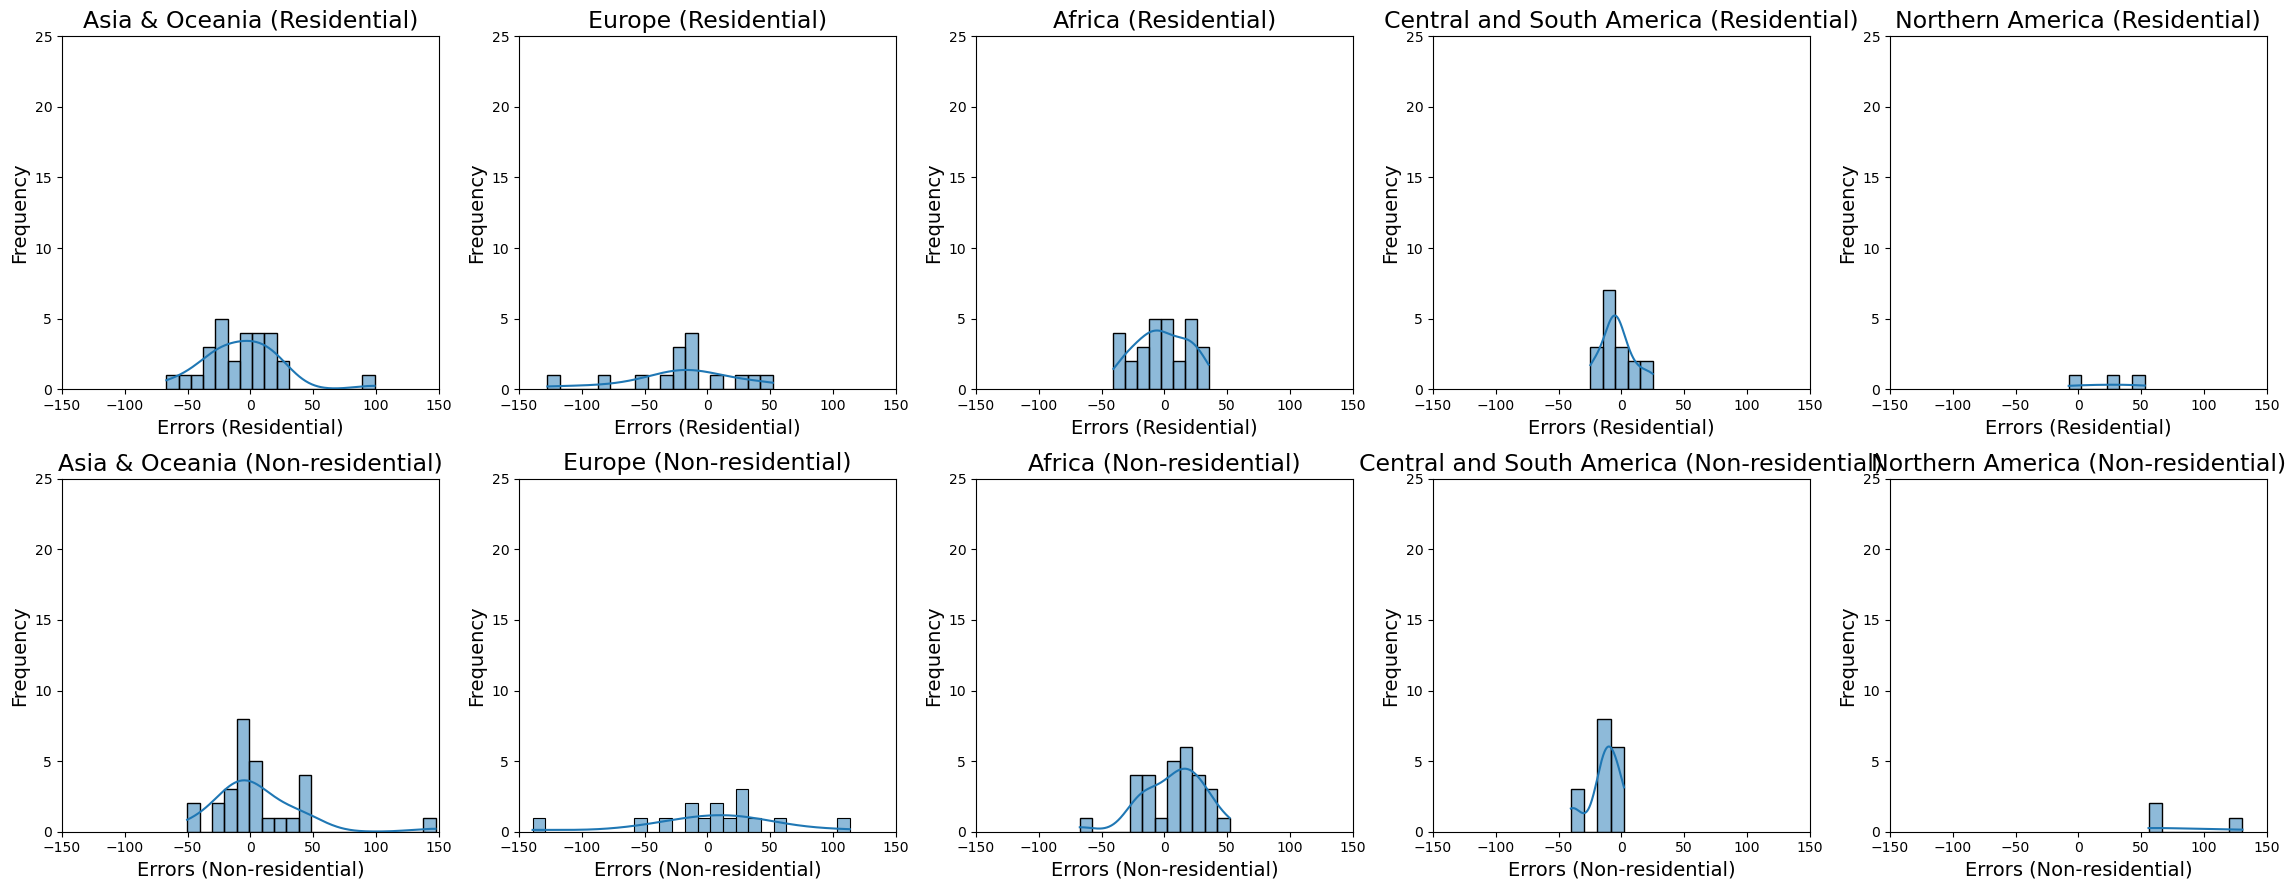

In [14]:
model_ridge_all = Ridge(**ridge_params)
results_ridge_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_ridge_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(results_ridge_all,
    save_path='../figures/model_plots/ridge_all_domain_eui_predictions.png')

create_error_distribution_plots(results_ridge_all,
    save_path='../figures/model_plots/ridge_all_domain_error_distribution.png')

In [15]:
RidgeModel = lambda: Ridge(**ridge_params)

ridge_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=RidgeModel,
   feature_abbreviations=feature_abbreviations,
   model_details="Ridge, " + ", ".join(f"{k}={v}" for k, v in ridge_params.items())
)
ridge_detailed_results['Model'] = 'LR Ridge'
ridge_average_results = calculate_average_metrics(ridge_detailed_results).reset_index()

ridge_average_results

Target       Strategy     Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LR Ridge   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LR Ridge   
2  Non-residential EUI (kWh/m2/year)     all_domain  LR Ridge   
3      Residential EUI (kWh/m2/year)  within_domain  LR Ridge   
4      Residential EUI (kWh/m2/year)   cross_domain  LR Ridge   
5      Residential EUI (kWh/m2/year)     all_domain  LR Ridge   

      Model Details                                      Features Used  \
0  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
1  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
2  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
3  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
4  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
5  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   

                                Features Abbreviated   MAPE      R²       MSE  \
0  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  14.64   0.013  1957.323   
1  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  38.56 -27.912  5276.291   
2  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  20.14  -2.679  2629.717   
3  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  19.72   0.185  1559.078   
4  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  31.80  -2.755  1475.979   
5  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  22.34  -0.256  1025.907   

     RMSE     MAE   WAPE  
0  35.428  25.844  12.78  
1  69.427  59.305  38.22  
2  44.823  35.743  19.30  
3  30.820  22.515  16.78  
4  38.010  31.569  30.14  
5  29.680  23.477  20.16

In [16]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M")

ridge_detailed_results.to_csv(f'../results/{timestamp}_ridge_detailed_results.csv')
ridge_average_results.to_csv(f'../results/{timestamp}_ridge_average_results.csv')


# Linear Regression - Lasso regularization

In [17]:
lasso_params = {
    'alpha': 1.0,          # regularization strength
  #  'fit_intercept': True, # include bias term
  #  'max_iter': 1000,      # maximum iterations
  #  'tol': 1e-4,          # tolerance for optimization
  #  'selection': 'cyclic', # feature selection method
  #  'random_state': 42     # for reproducibility
}

### Linear Regression - Lasso - Within Domain

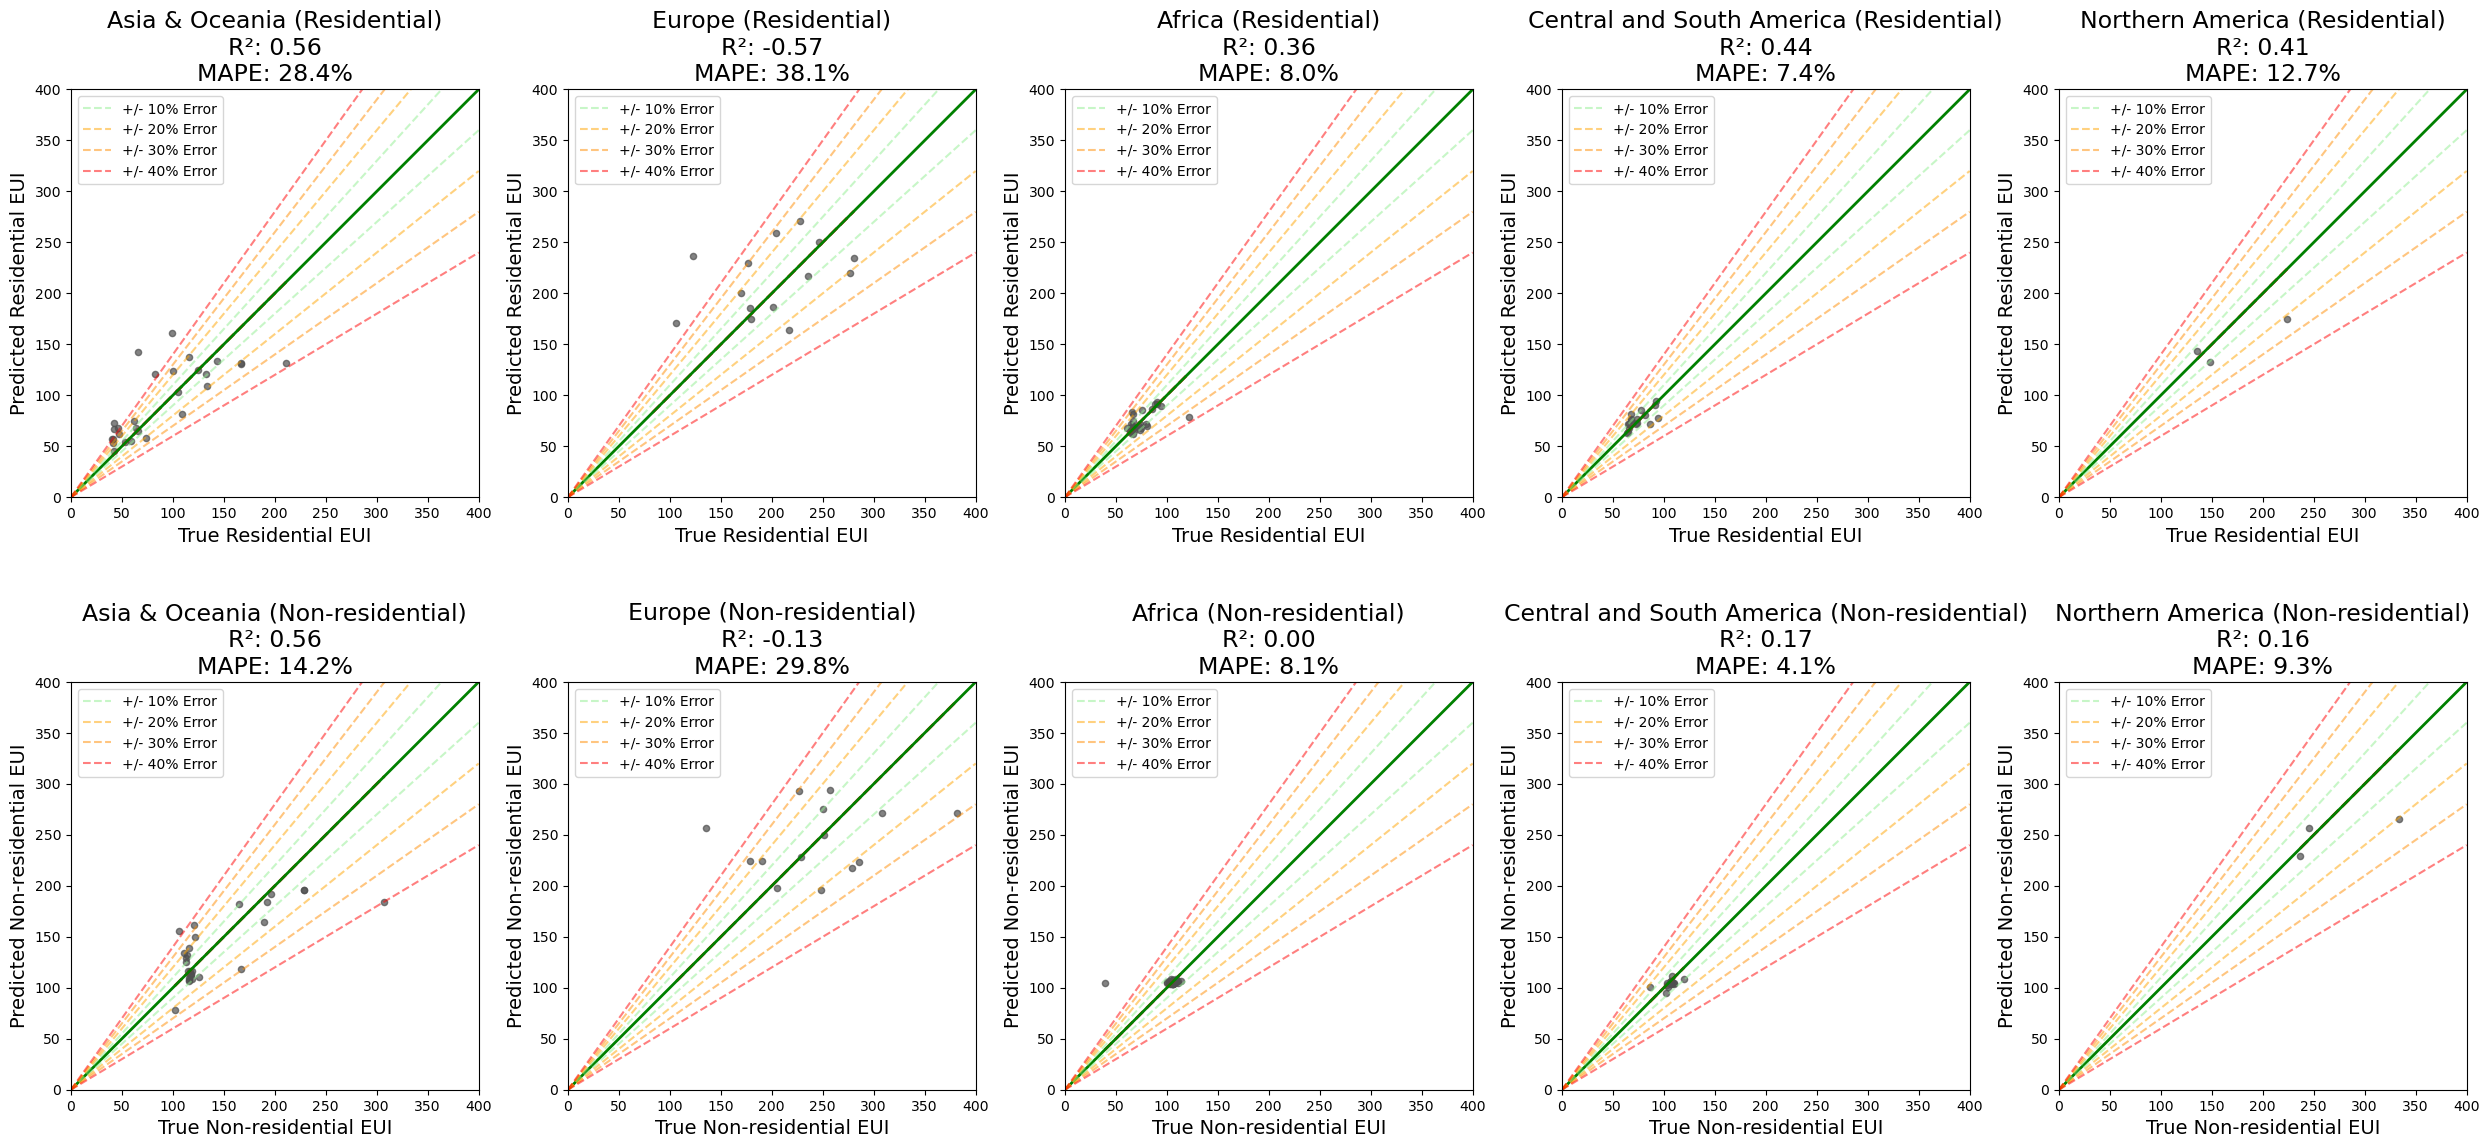

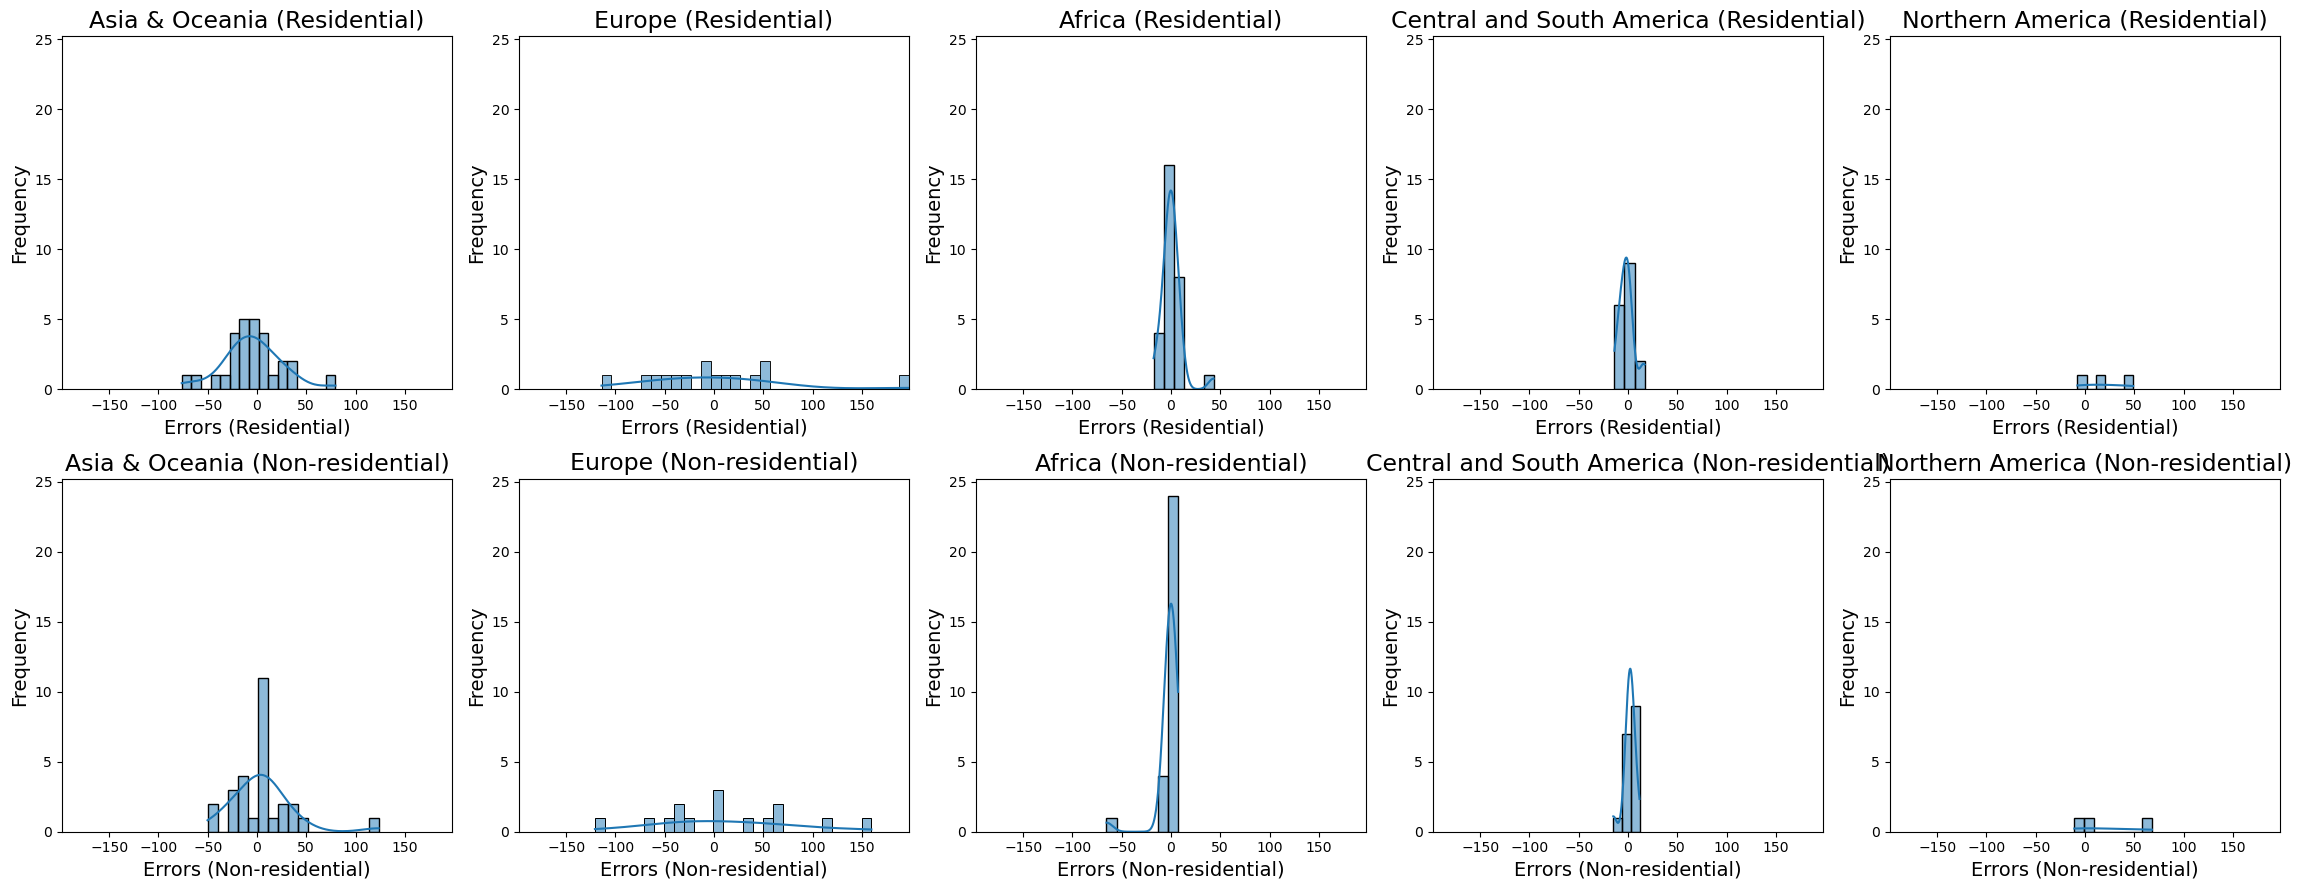

In [18]:
# Within-domain with Lasso
model_lasso_within = Lasso(**lasso_params)
results_lasso_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_lasso_within,
    strategy='within_domain'
)

create_eui_comparison_plots(results_lasso_within, 
    save_path='../figures/model_plots/lasso_within_domain_eui_predictions.png')

create_error_distribution_plots(results_lasso_within,
    save_path='../figures/model_plots/lasso_within_domain_error_distribution.png')


### Linear Regression - Lasso - Cross Domain

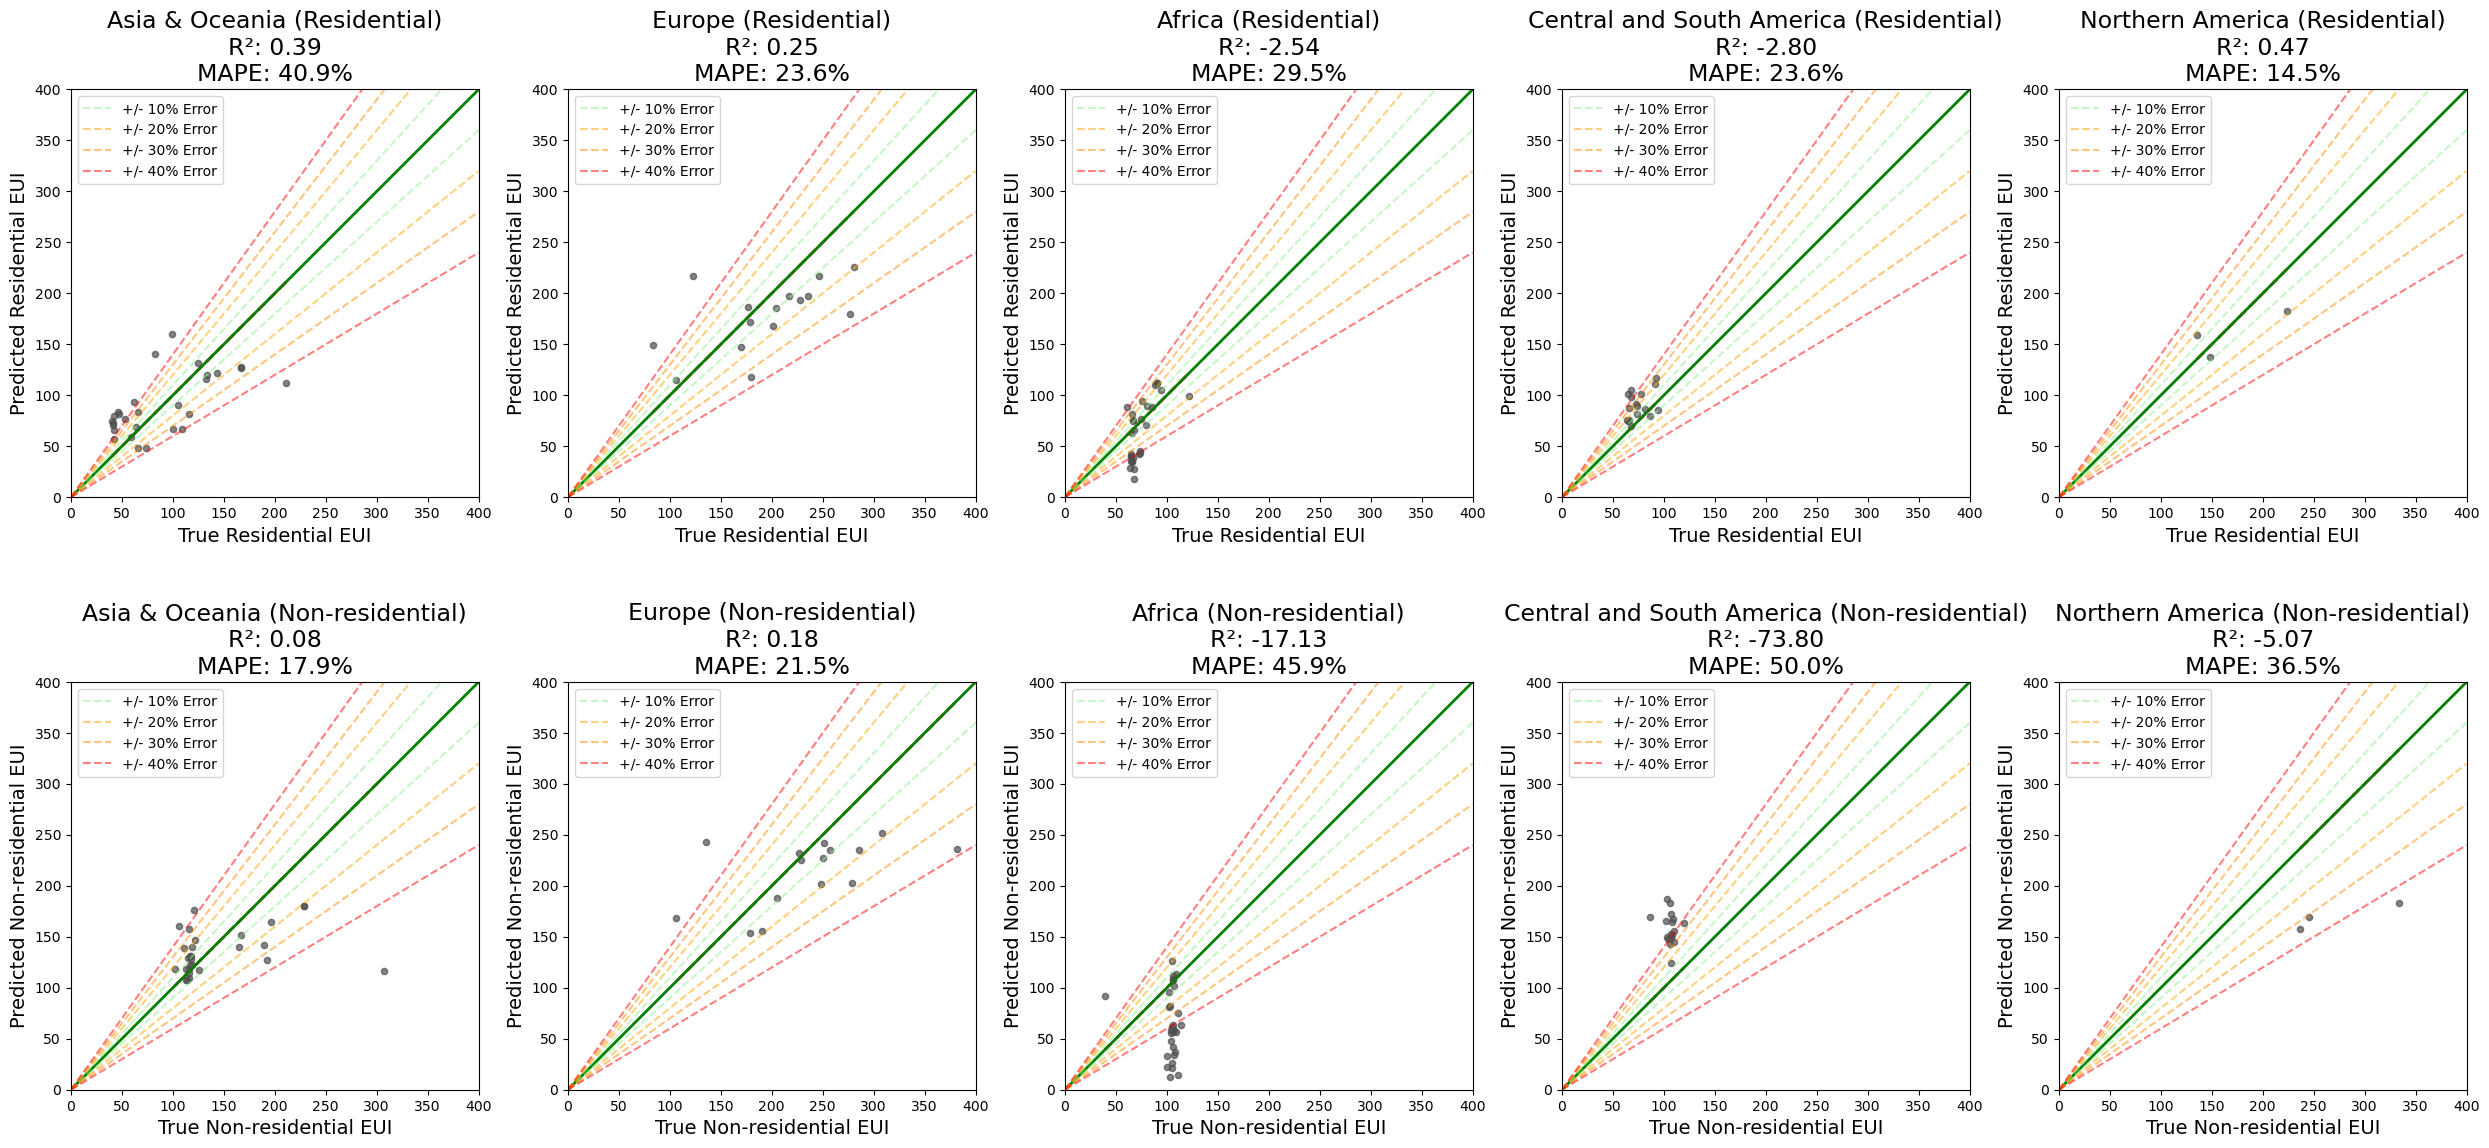

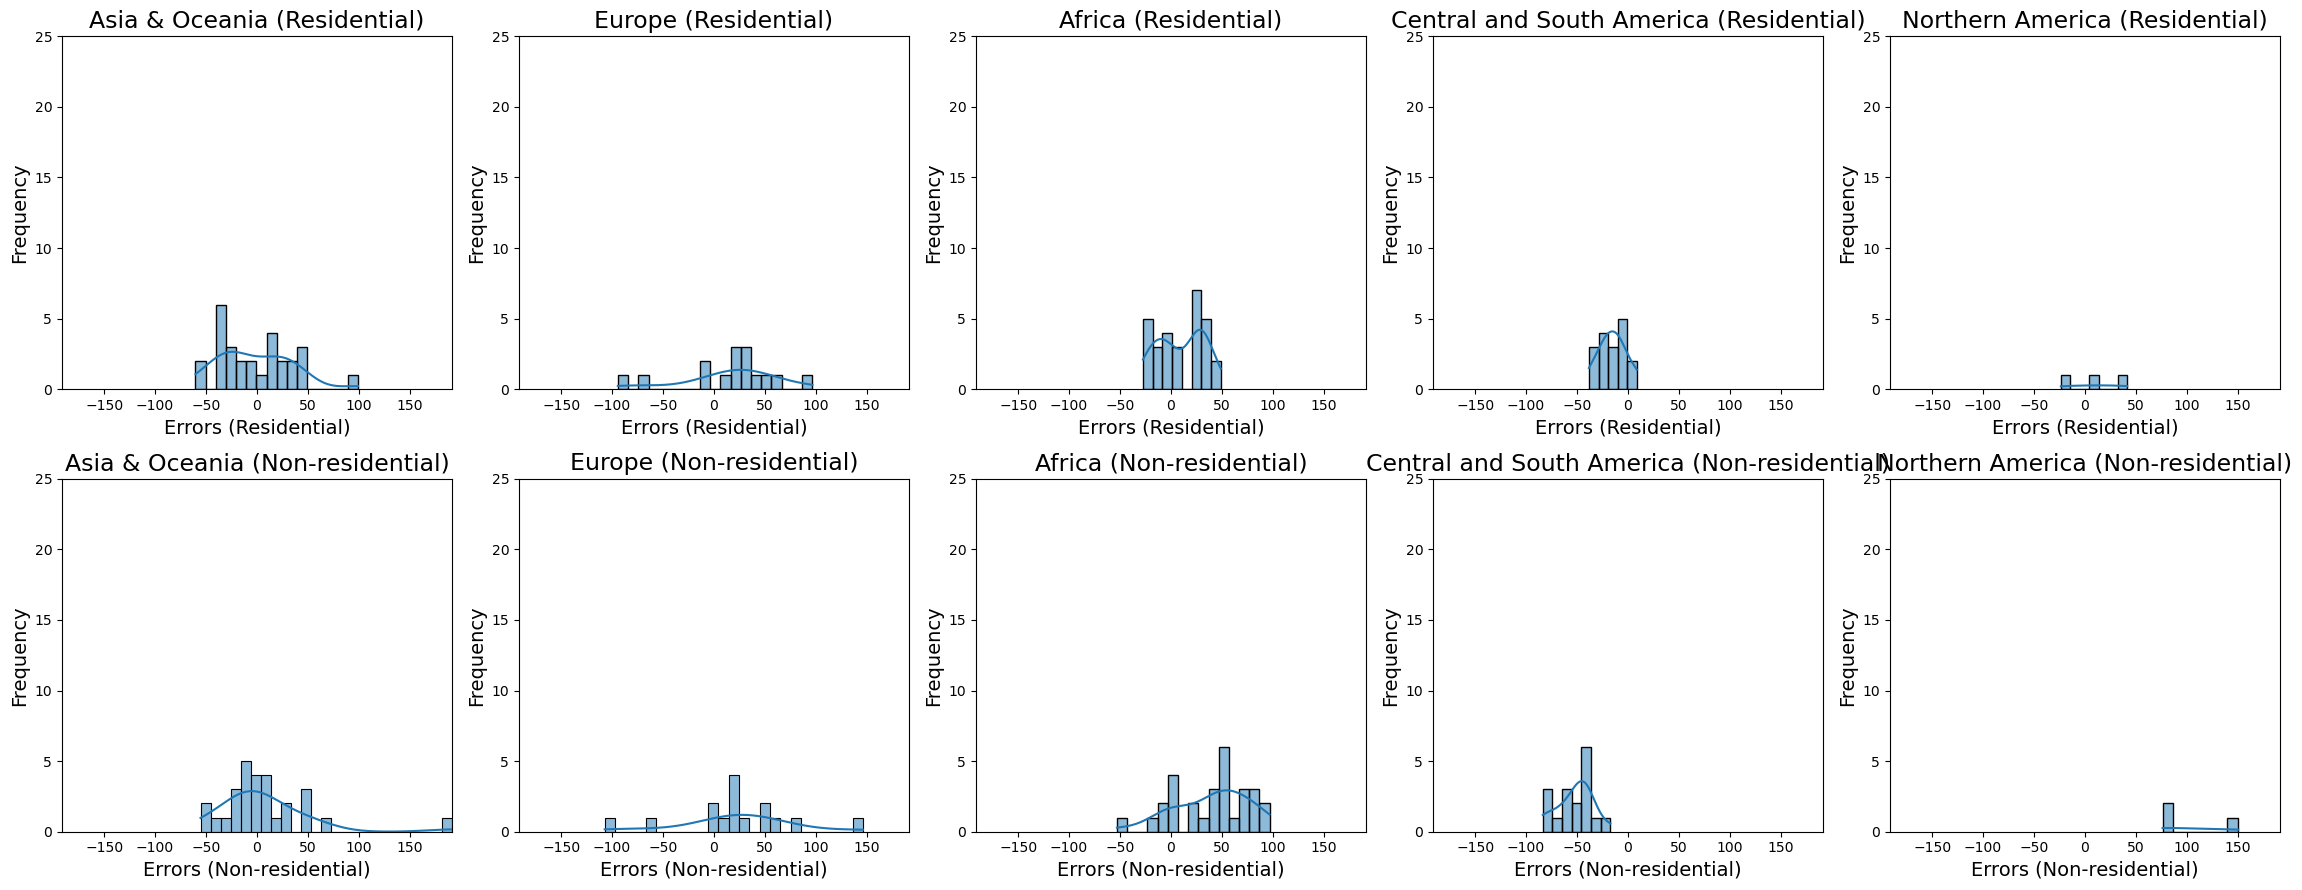

In [19]:
# Cross-domain with Lasso
model_lasso_cross = Lasso(**lasso_params)
results_lasso_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_lasso_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(results_lasso_cross,
    save_path='../figures/model_plots/lasso_cross_domain_eui_predictions.png')

create_error_distribution_plots(results_lasso_cross,
    save_path='../figures/model_plots/lasso_cross_domain_error_distribution.png')


### Linear Regression - Lasso - All Domain

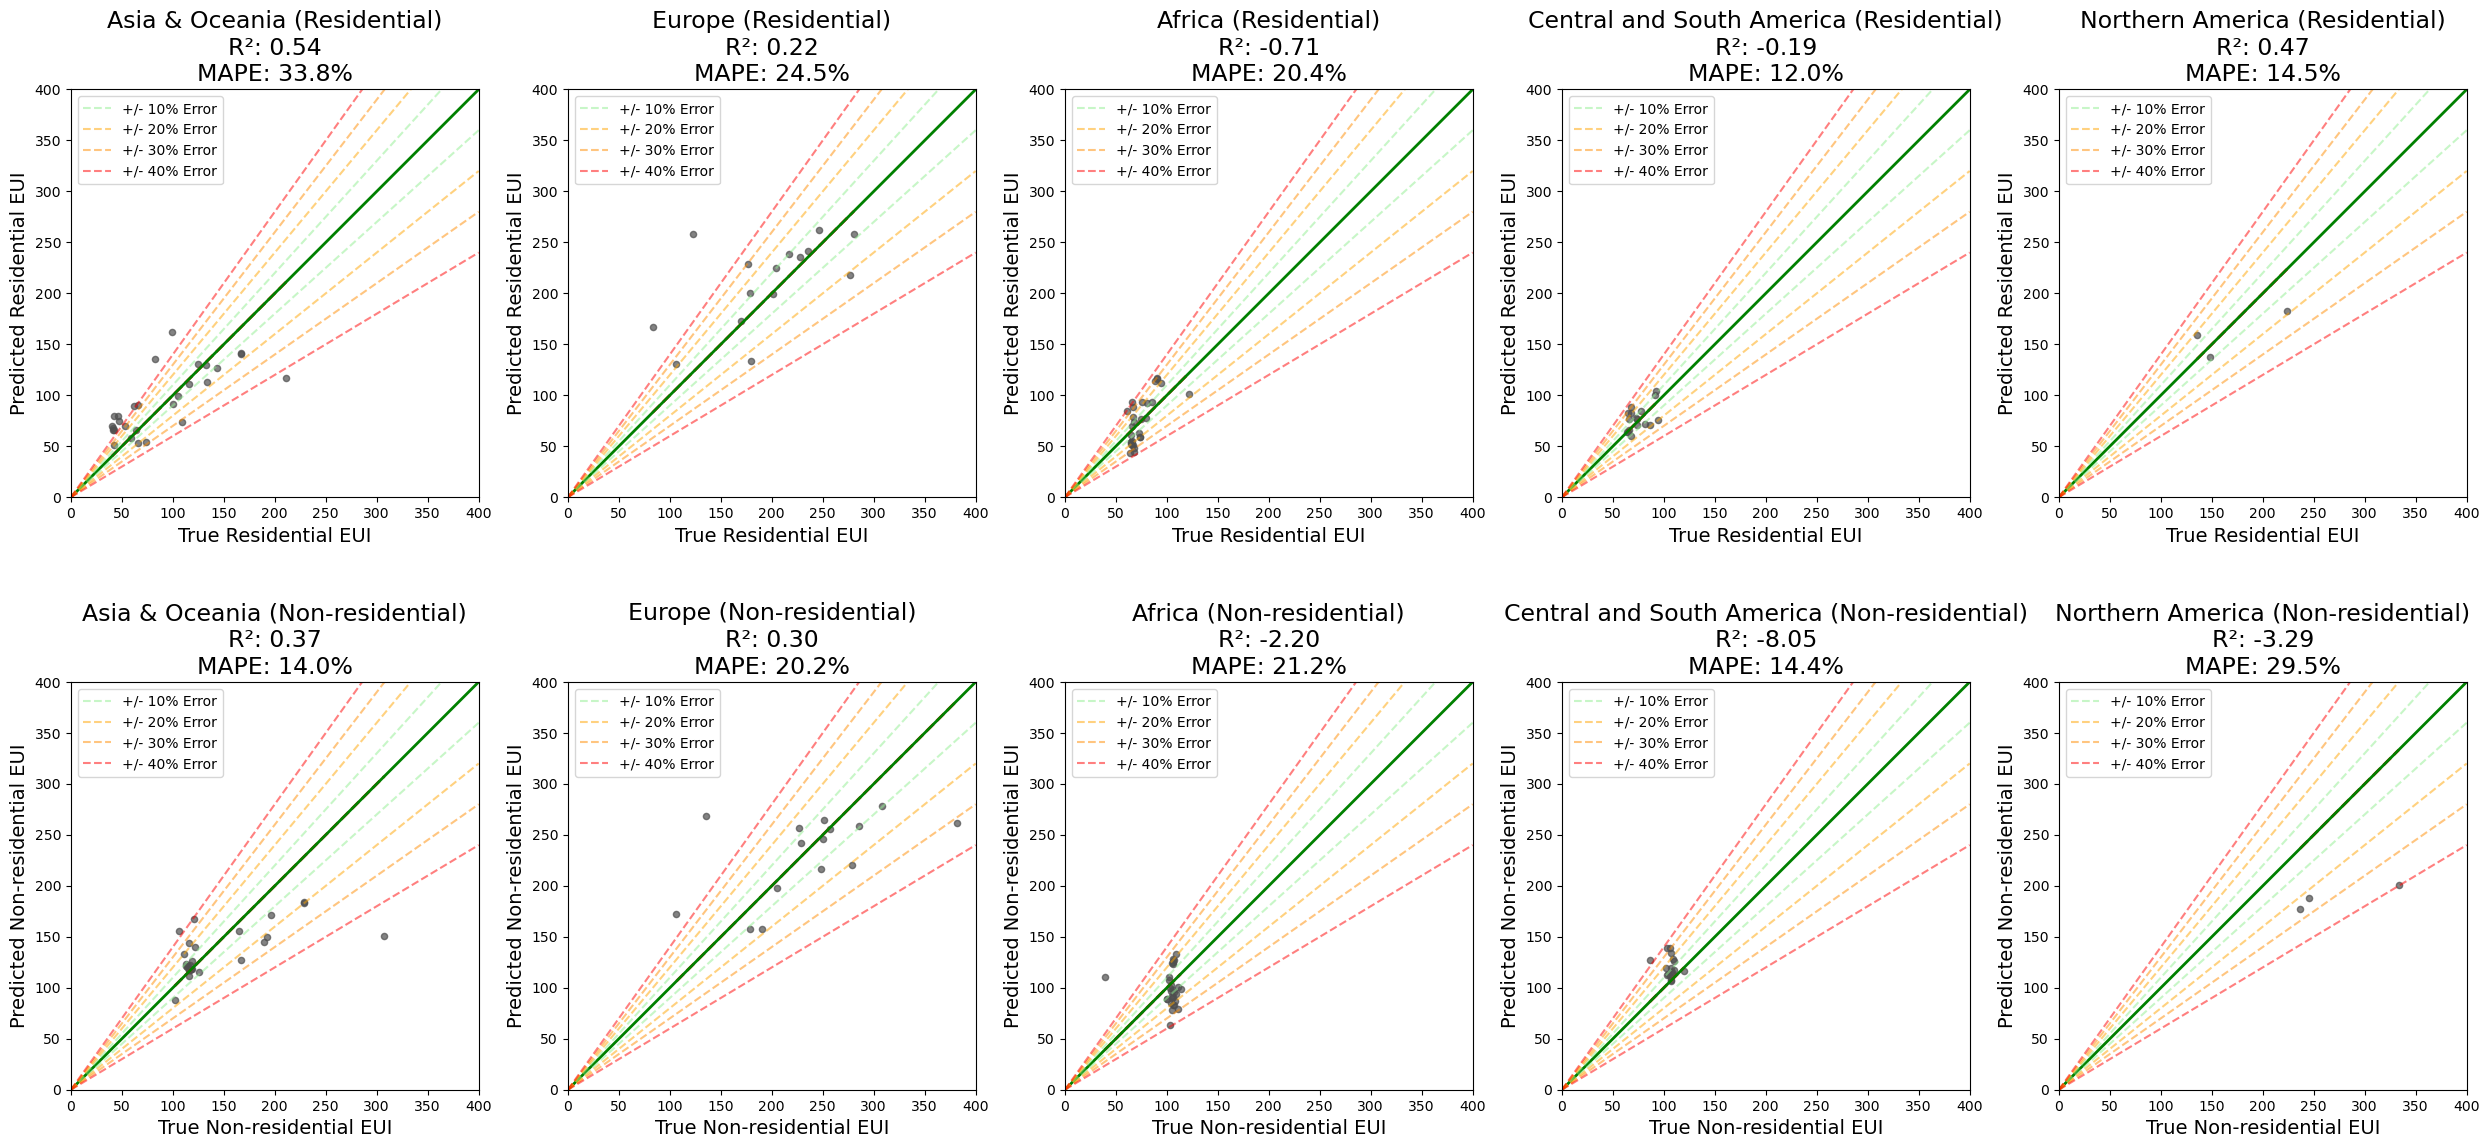

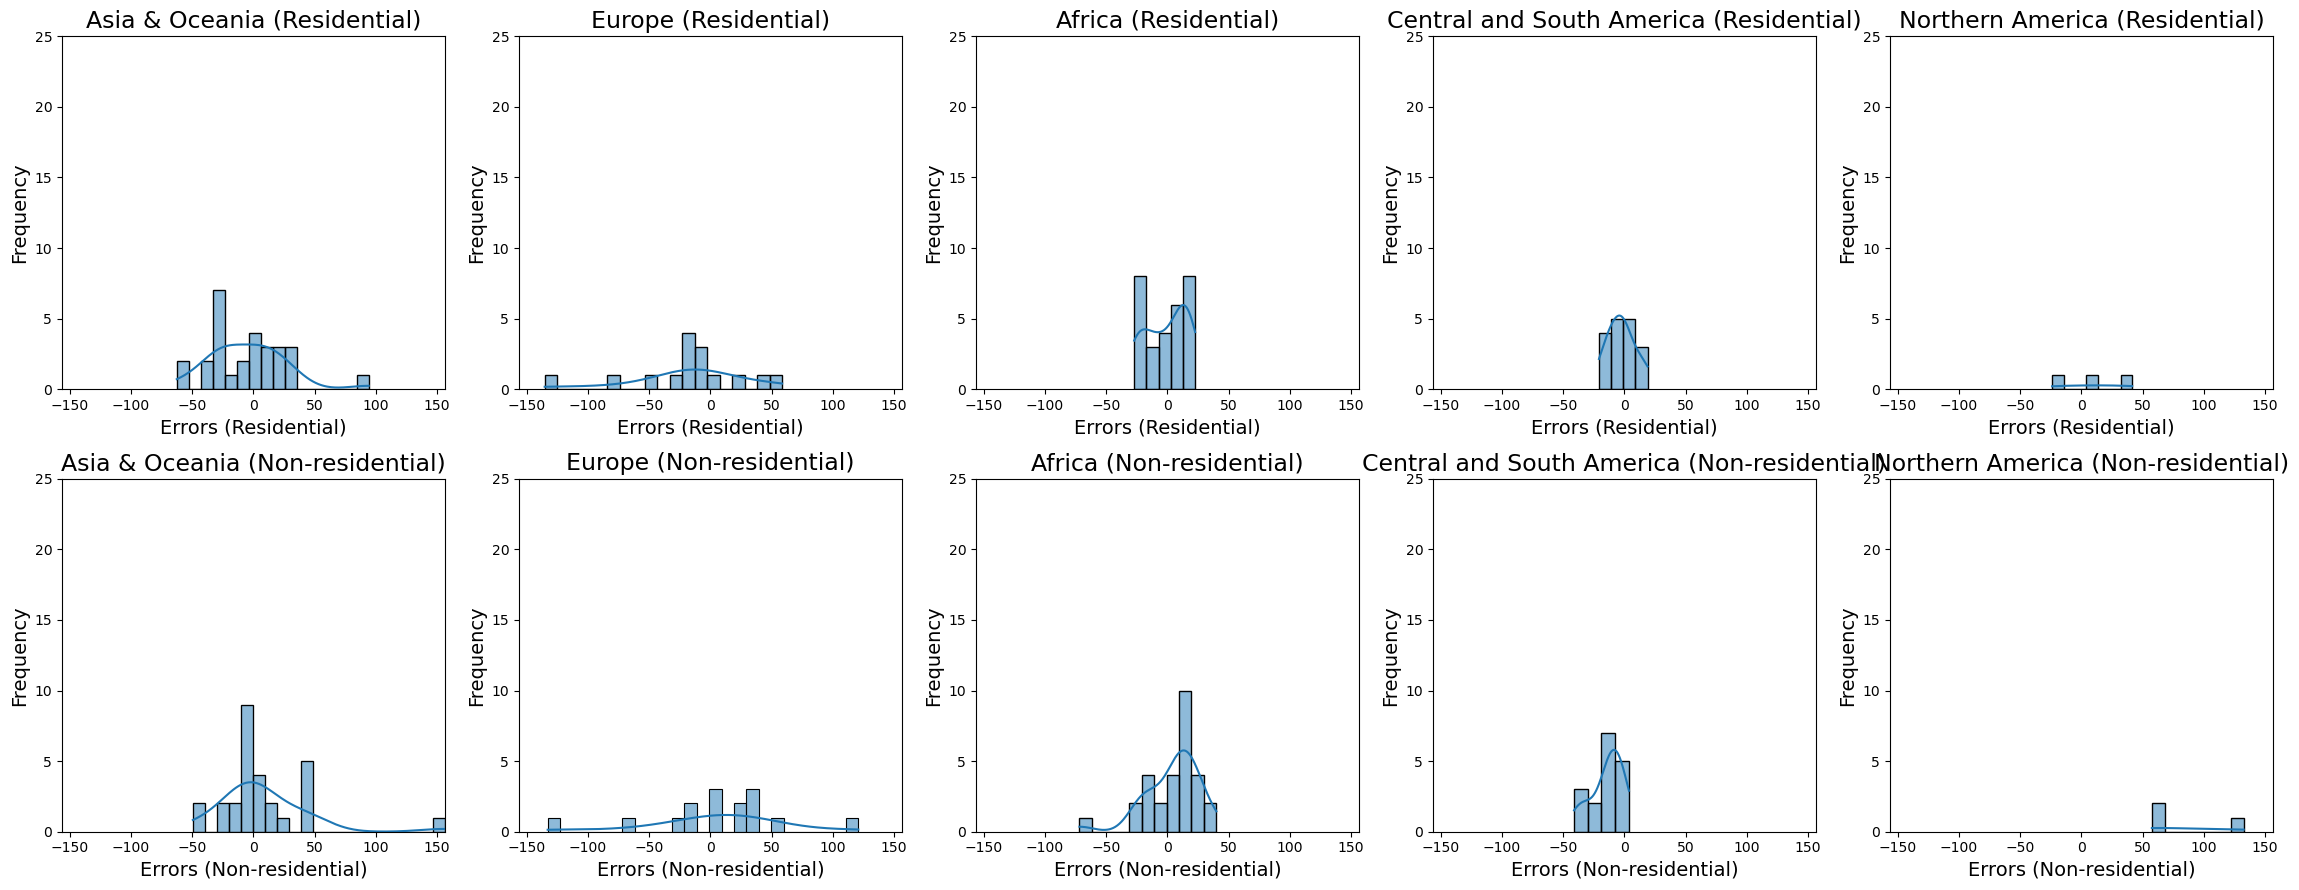

In [20]:
# All-domain with Lasso
model_lasso_all = Lasso(**lasso_params)
results_lasso_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_lasso_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(results_lasso_all,
    save_path='../figures/model_plots/lasso_all_domain_eui_predictions.png')

create_error_distribution_plots(results_lasso_all,
    save_path='../figures/model_plots/lasso_all_domain_error_distribution.png')

In [21]:
LassoModel = lambda: Lasso(**lasso_params)

lasso_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=LassoModel,  
   feature_abbreviations=feature_abbreviations,
   model_details="Lasso, " + ", ".join(f"{k} = {v}" for k, v in lasso_params.items())
)

lasso_detailed_results['Model'] = 'LR Lasso'
lasso_average_results = calculate_average_metrics(lasso_detailed_results).reset_index()
lasso_average_results

Target       Strategy     Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LR Lasso   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LR Lasso   
2  Non-residential EUI (kWh/m2/year)     all_domain  LR Lasso   
3      Residential EUI (kWh/m2/year)  within_domain  LR Lasso   
4      Residential EUI (kWh/m2/year)   cross_domain  LR Lasso   
5      Residential EUI (kWh/m2/year)     all_domain  LR Lasso   

        Model Details                                      Features Used  \
0  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
1  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
2  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
3  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
4  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
5  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   

                                Features Abbreviated   MAPE      R²       MSE  \
0  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  13.10   0.154  1544.727   
1  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  34.36 -19.148  4630.325   
2  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  19.86  -2.574  2707.493   
3  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  18.92   0.240  1382.455   
4  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  26.42  -0.847  1086.895   
5  HDD | CDD | GDP | URB | Paris | HDI | EDU | In...  21.04   0.069   923.274   

     RMSE     MAE   WAPE  
0  32.066  22.734  11.46  
1  64.423  54.809  34.06  
2  45.092  35.789  19.04  
3  29.707  21.846  16.32  
4  31.395  26.674  24.14  
5  27.367  21.700  18.54

In [22]:
lasso_detailed_results.to_csv(f'../results/{timestamp}_lasso_detailed_results.csv')
lasso_average_results.to_csv(f'../results/{timestamp}_lasso_average_results.csv')